# Surprise Housing - Advance Linear Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file
<br>
<br>
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
<br>
The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.<br>

#### Determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Importing Required Packages and Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import the librarires to Build the models and preprocess the data
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#To ensure that any numerical data does not display as scientific notation
pd.options.display.float_format = '{:,.2f}'.format

pd.set_option("display.max_columns", None)

%matplotlib inline

## Data Understanding & Insepction

In [2]:
#Reading Dataframe
df=pd.read_csv('train.csv')

In [3]:
#Checking Head 
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0      196.00        Gd        TA      PConc       Gd       TA           No   
1        0.00        TA        TA     CBlock       Gd       TA           Gd   
2      162.00        Gd        TA      PConc       Gd       TA           Mn   
3        0.00        TA        TA     BrkTil       TA       Gd           No   
4      350.00        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
#Checking shape
df.shape

(1460, 81)

In [5]:
#Understanding the data types of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Checking dataframe summary
def data_summary(df):
    print('Shape of Dataframe is: ',df.shape)
    s=pd.DataFrame()
    s['Features']=df.columns
    s['type']=list(df.dtypes)
    s['Missing Values']=df.isnull().sum().values
    s['Uniques'] = df.nunique().values
    s['First Values']=df.loc[0].values
    s['Second Values']=df.loc[1].values
    s['Third Values']=df.loc[2].values
    
    return s


data_summary(df)

Shape of Dataframe is:  (1460, 81)


Features     type  Missing Values  Uniques First Values  \
0              Id    int64               0     1460            1   
1      MSSubClass    int64               0       15           60   
2        MSZoning   object               0        5           RL   
3     LotFrontage  float64             259      110        65.00   
4         LotArea    int64               0     1073         8450   
..            ...      ...             ...      ...          ...   
76         MoSold    int64               0       12            2   
77         YrSold    int64               0        5         2008   
78       SaleType   object               0        9           WD   
79  SaleCondition   object               0        6       Normal   
80      SalePrice    int64               0      663       208500   

   Second Values Third Values  
0              2            3  
1             20           60  
2             RL           RL  
3          80.00        68.00  
4           9600        11250  
..           ...          ...  
76             5            9  
77          2007         2008  
78            WD           WD  
79        Normal       Normal  
80        181500       223500  

[81 rows x 7 columns]

In [7]:
#Summary stats of the columns
df.describe().T

count       mean       std       min        25%        50%  \
Id            1,460.00     730.50    421.61      1.00     365.75     730.50   
MSSubClass    1,460.00      56.90     42.30     20.00      20.00      50.00   
LotFrontage   1,201.00      70.05     24.28     21.00      59.00      69.00   
LotArea       1,460.00  10,516.83  9,981.26  1,300.00   7,553.50   9,478.50   
OverallQual   1,460.00       6.10      1.38      1.00       5.00       6.00   
OverallCond   1,460.00       5.58      1.11      1.00       5.00       5.00   
YearBuilt     1,460.00   1,971.27     30.20  1,872.00   1,954.00   1,973.00   
YearRemodAdd  1,460.00   1,984.87     20.65  1,950.00   1,967.00   1,994.00   
MasVnrArea    1,452.00     103.69    181.07      0.00       0.00       0.00   
BsmtFinSF1    1,460.00     443.64    456.10      0.00       0.00     383.50   
BsmtFinSF2    1,460.00      46.55    161.32      0.00       0.00       0.00   
BsmtUnfSF     1,460.00     567.24    441.87      0.00     223.00     477.50   
TotalBsmtSF   1,460.00   1,057.43    438.71      0.00     795.75     991.50   
1stFlrSF      1,460.00   1,162.63    386.59    334.00     882.00   1,087.00   
2ndFlrSF      1,460.00     346.99    436.53      0.00       0.00       0.00   
LowQualFinSF  1,460.00       5.84     48.62      0.00       0.00       0.00   
GrLivArea     1,460.00   1,515.46    525.48    334.00   1,129.50   1,464.00   
BsmtFullBath  1,460.00       0.43      0.52      0.00       0.00       0.00   
BsmtHalfBath  1,460.00       0.06      0.24      0.00       0.00       0.00   
FullBath      1,460.00       1.57      0.55      0.00       1.00       2.00   
HalfBath      1,460.00       0.38      0.50      0.00       0.00       0.00   
BedroomAbvGr  1,460.00       2.87      0.82      0.00       2.00       3.00   
KitchenAbvGr  1,460.00       1.05      0.22      0.00       1.00       1.00   
TotRmsAbvGrd  1,460.00       6.52      1.63      2.00       5.00       6.00   
Fireplaces    1,460.00       0.61      0.64      0.00       0.00       1.00   
GarageYrBlt   1,379.00   1,978.51     24.69  1,900.00   1,961.00   1,980.00   
GarageCars    1,460.00       1.77      0.75      0.00       1.00       2.00   
GarageArea    1,460.00     472.98    213.80      0.00     334.50     480.00   
WoodDeckSF    1,460.00      94.24    125.34      0.00       0.00       0.00   
OpenPorchSF   1,460.00      46.66     66.26      0.00       0.00      25.00   
EnclosedPorch 1,460.00      21.95     61.12      0.00       0.00       0.00   
3SsnPorch     1,460.00       3.41     29.32      0.00       0.00       0.00   
ScreenPorch   1,460.00      15.06     55.76      0.00       0.00       0.00   
PoolArea      1,460.00       2.76     40.18      0.00       0.00       0.00   
MiscVal       1,460.00      43.49    496.12      0.00       0.00       0.00   
MoSold        1,460.00       6.32      2.70      1.00       5.00       6.00   
YrSold        1,460.00   2,007.82      1.33  2,006.00   2,007.00   2,008.00   
SalePrice     1,460.00 180,921.20 79,442.50 34,900.00 129,975.00 163,000.00   

                     75%        max  
Id              1,095.25   1,460.00  
MSSubClass         70.00     190.00  
LotFrontage        80.00     313.00  
LotArea        11,601.50 215,245.00  
OverallQual         7.00      10.00  
OverallCond         6.00       9.00  
YearBuilt       2,000.00   2,010.00  
YearRemodAdd    2,004.00   2,010.00  
MasVnrArea        166.00   1,600.00  
BsmtFinSF1        712.25   5,644.00  
BsmtFinSF2          0.00   1,474.00  
BsmtUnfSF         808.00   2,336.00  
TotalBsmtSF     1,298.25   6,110.00  
1stFlrSF        1,391.25   4,692.00  
2ndFlrSF          728.00   2,065.00  
LowQualFinSF        0.00     572.00  
GrLivArea       1,776.75   5,642.00  
BsmtFullBath        1.00       3.00  
BsmtHalfBath        0.00       2.00  
FullBath            2.00       3.00  
HalfBath            1.00       2.00  
BedroomAbvGr        3.00       8.00  
KitchenAbvGr        1.00       3.00  
TotRmsAbvGrd        7.0

In [8]:
df.describe(include='O').T.sort_values('freq',ascending=False).head(10)

count unique      top  freq
Utilities   1460      2   AllPub  1459
Street      1460      2     Pave  1454
Condition2  1460      8     Norm  1445
RoofMatl    1460      8  CompShg  1434
Heating     1460      6     GasA  1428
LandSlope   1460      3      Gtl  1382
CentralAir  1460      2        Y  1365
Functional  1460      7      Typ  1360
PavedDrive  1460      3        Y  1340
Electrical  1459      5    SBrkr  1334

From the observation we find the above columns have one categories to be predominantly high. We will handle this further.

In [9]:
#Analysing missing values
(df.isnull().sum().sort_values(ascending=False)).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [10]:
#Analysing missing values in %
(df.isnull().sum().sort_values(ascending=False)/len(df)*100).head(20)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
LotFrontage    17.74
GarageYrBlt     5.55
GarageCond      5.55
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
MasVnrArea      0.55
MasVnrType      0.55
Electrical      0.07
Id              0.00
dtype: float64

In [11]:
#Dataframe of missing columns
missing_col=df.isnull().sum().sort_values(ascending=False).head(19).index
df[missing_col]

PoolQC MiscFeature Alley  Fence FireplaceQu  LotFrontage  GarageYrBlt  \
0       NaN         NaN   NaN    NaN         NaN        65.00     2,003.00   
1       NaN         NaN   NaN    NaN          TA        80.00     1,976.00   
2       NaN         NaN   NaN    NaN          TA        68.00     2,001.00   
3       NaN         NaN   NaN    NaN          Gd        60.00     1,998.00   
4       NaN         NaN   NaN    NaN          TA        84.00     2,000.00   
...     ...         ...   ...    ...         ...          ...          ...   
1455    NaN         NaN   NaN    NaN          TA        62.00     1,999.00   
1456    NaN         NaN   NaN  MnPrv          TA        85.00     1,978.00   
1457    NaN        Shed   NaN  GdPrv          Gd        66.00     1,941.00   
1458    NaN         NaN   NaN    NaN         NaN        68.00     1,950.00   
1459    NaN         NaN   NaN    NaN         NaN        75.00     1,965.00   

     GarageCond GarageType GarageFinish GarageQual BsmtFinType2 BsmtExposure  \
0            TA     Attchd          RFn         TA          Unf           No   
1            TA     Attchd          RFn         TA          Unf           Gd   
2            TA     Attchd          RFn         TA          Unf           Mn   
3            TA     Detchd          Unf         TA          Unf           No   
4            TA     Attchd          RFn         TA          Unf           Av   
...         ...        ...          ...        ...          ...          ...   
1455         TA     Attchd          RFn         TA          Unf           No   
1456         TA     Attchd          Unf         TA          Rec           No   
1457         TA     Attchd          RFn         TA          Unf           No   
1458         TA     Attchd          Unf         TA          Rec           Mn   
1459         TA     Attchd          Fin         TA          LwQ           No   

     BsmtQual BsmtCond BsmtFinType1  MasVnrArea MasVnrType Electrical  
0          Gd       TA          GLQ      196.00    BrkFace      SBrkr  
1          Gd       TA          ALQ        0.00       None      SBrkr  
2          Gd       TA          GLQ      162.00    BrkFace      SBrkr  
3          TA       Gd          ALQ        0.00       None      SBrkr  
4          Gd       TA          GLQ      350.00    BrkFace      SBrkr  
...       ...      ...          ...         ...        ...        ...  
1455       Gd       TA          Unf        0.00       None      SBrkr  
1456       Gd       TA          ALQ      119.00      Stone      SBrkr  
1457       TA       Gd          GLQ        0.00       None      SBrkr  
1458       TA       TA          GLQ        0.00       None      FuseA  
1459       TA       TA          BLQ        0.00       None      SBrkr  

[1460 rows x 19 columns]

In [12]:
#Checking missing values across rows
df.isnull().sum(axis=1).sort_values(ascending=False).head(10)

39      15
1011    15
1218    15
533     15
1179    14
705     14
520     14
1143    11
1035    11
1030    11
dtype: int64

#### Observation:
**Few columns that have large missing values, but in reality they have NA values that had some meaning to it Eg: PoolQC had NA which means(No Pool). Hence 'NA' category can be imputed with 'None' to make more easy to understand for all such categorical variables.**

In [13]:
#Categorical columns: All NA's are imputed with None to make it meaningful
num_cols=[col for col in df.columns if df[col].dtype!='O']
cat_cols=df.columns.difference(num_cols)
cat_imputer=SimpleImputer(strategy='constant',fill_value='None')
df[cat_cols]=cat_imputer.fit_transform(df[cat_cols])

In [14]:
#Insepcting all the category columns to check if they are replaced with None
df[cat_cols].head()

Alley BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual  \
0  None     1Fam       TA           No          GLQ          Unf       Gd   
1  None     1Fam       TA           Gd          ALQ          Unf       Gd   
2  None     1Fam       TA           Mn          GLQ          Unf       Gd   
3  None     1Fam       Gd           No          ALQ          Unf       TA   
4  None     1Fam       TA           Av          GLQ          Unf       Gd   

  CentralAir Condition1 Condition2 Electrical ExterCond ExterQual Exterior1st  \
0          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   
1          Y      Feedr       Norm      SBrkr        TA        TA     MetalSd   
2          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   
3          Y       Norm       Norm      SBrkr        TA        TA     Wd Sdng   
4          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   

  Exterior2nd Fence FireplaceQu Foundation Functional GarageCond GarageFinish  \
0     VinylSd  None        None      PConc        Typ         TA          RFn   
1     MetalSd  None          TA     CBlock        Typ         TA          RFn   
2     VinylSd  None          TA      PConc        Typ         TA          RFn   
3     Wd Shng  None          Gd     BrkTil        Typ         TA          Unf   
4     VinylSd  None          TA      PConc        Typ         TA          RFn   

  GarageQual GarageType Heating HeatingQC HouseStyle KitchenQual LandContour  \
0         TA     Attchd    GasA        Ex     2Story          Gd         Lvl   
1         TA     Attchd    GasA        Ex     1Story          TA         Lvl   
2         TA     Attchd    GasA        Ex     2Story          Gd         Lvl   
3         TA     Detchd    GasA        Gd     2Story          Gd         Lvl   
4         TA     Attchd    GasA        Ex     2Story          Gd         Lvl   

  LandSlope LotConfig LotShape MSZoning MasVnrType MiscFeature Neighborhood  \
0       Gtl    Inside      Reg       RL    BrkFace        None      CollgCr   
1       Gtl       FR2      Reg       RL       None        None      Veenker   
2       Gtl    Inside      IR1       RL    BrkFace        None      CollgCr   
3       Gtl    Corner      IR1       RL       None        None      Crawfor   
4       Gtl       FR2      IR1       RL    BrkFace        None      NoRidge   

  PavedDrive PoolQC RoofMatl RoofStyle SaleCondition SaleType Street Utilities  
0          Y   None  CompShg     Gable        Normal       WD   Pave    AllPub  
1          Y   None  CompShg     Gable        Normal       WD   Pave    AllPub  
2          Y   None  CompShg     Gable        Normal       WD   Pave    AllPub  
3          Y   None  CompShg     Gable       Abnorml       WD   Pave    AllPub  
4          Y   None  CompShg     Gable        Normal       WD   Pave    AllPub

In [15]:
#check null values after replacing the NA's with None
df.isnull().sum().sort_values(ascending=False).head(5)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
KitchenAbvGr      0
dtype: int64

# EDA

##  Uni-Variate Analysis

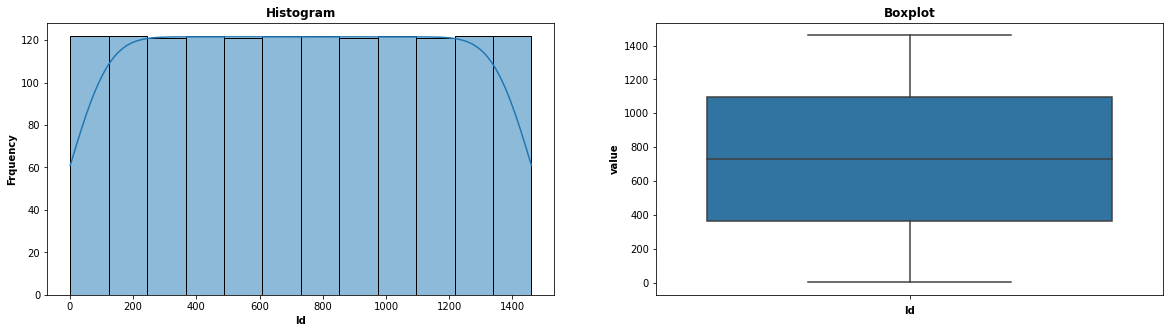

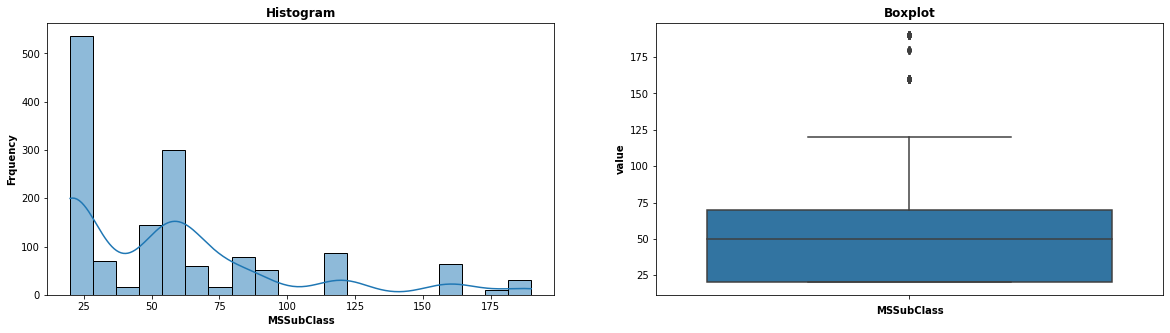

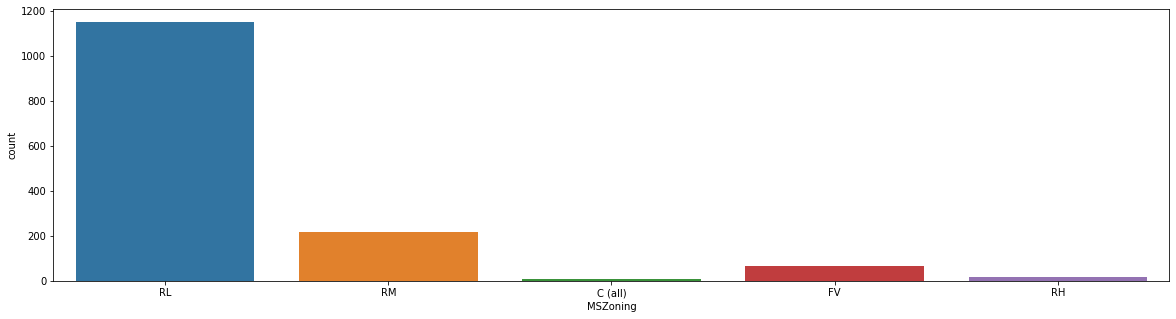

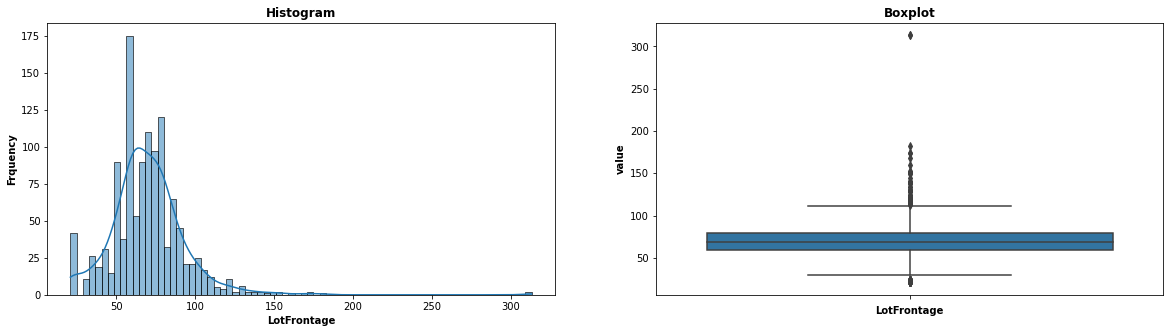

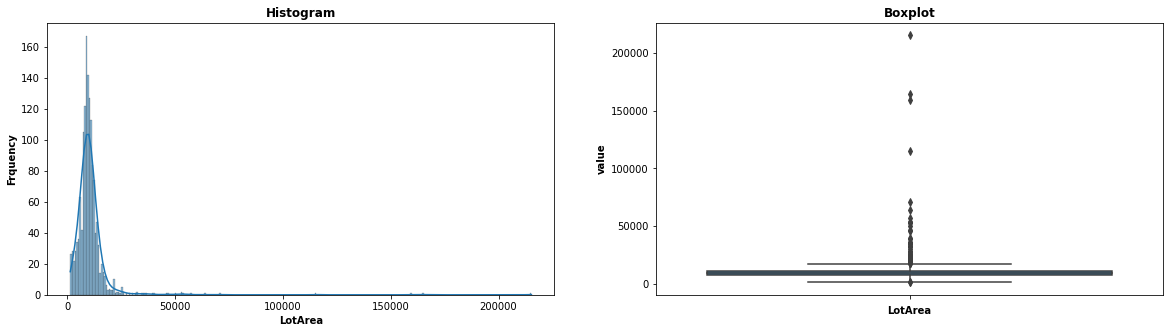

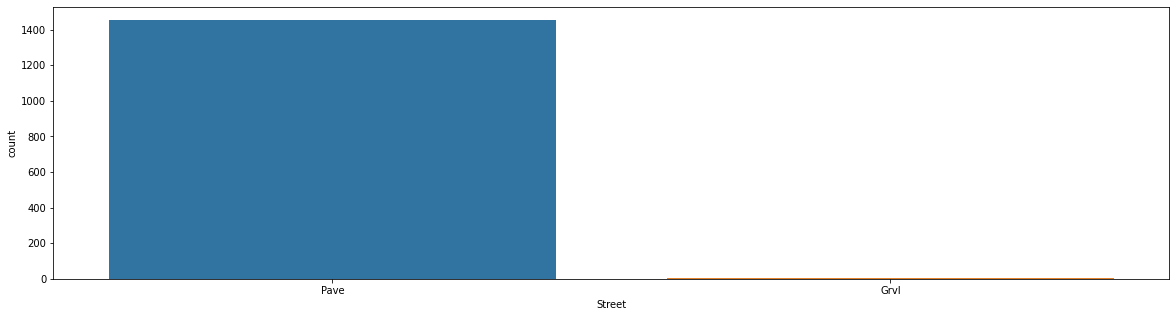

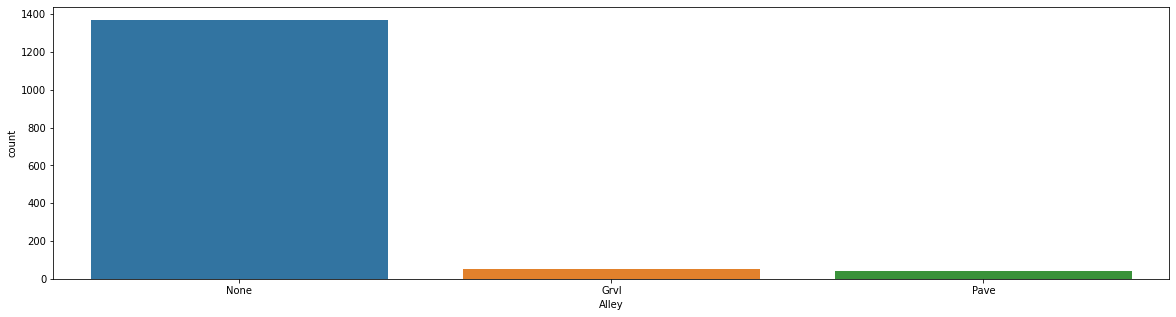

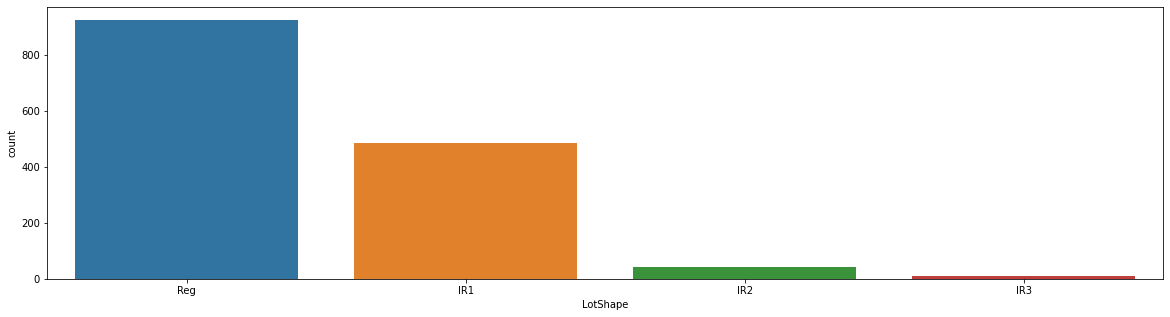

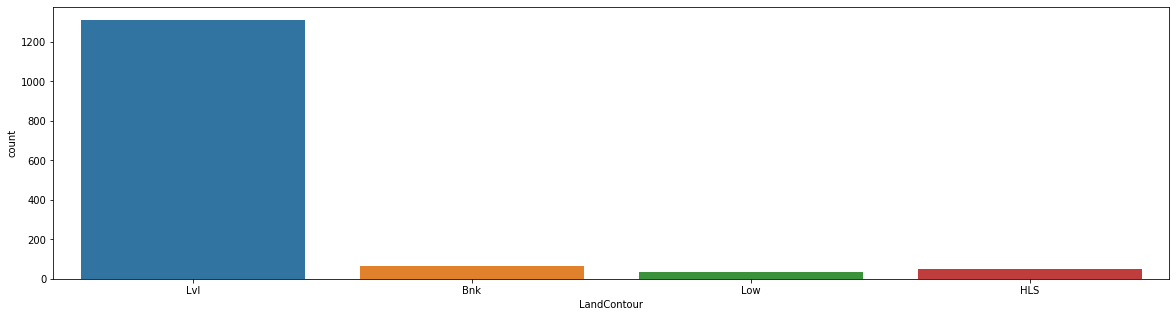

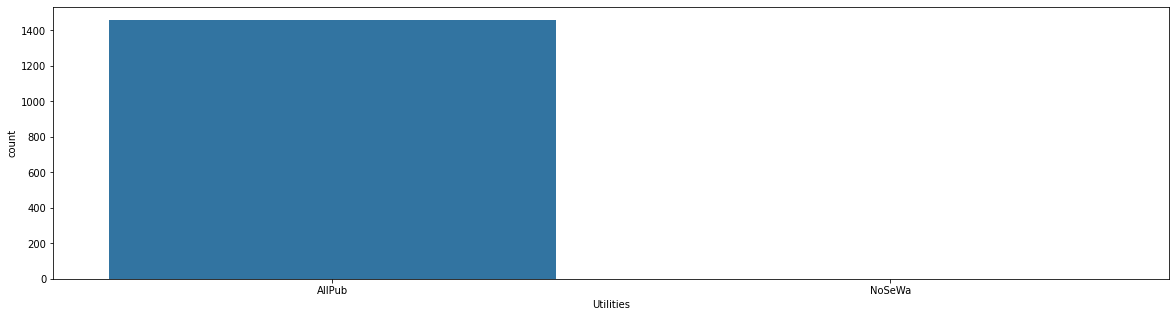

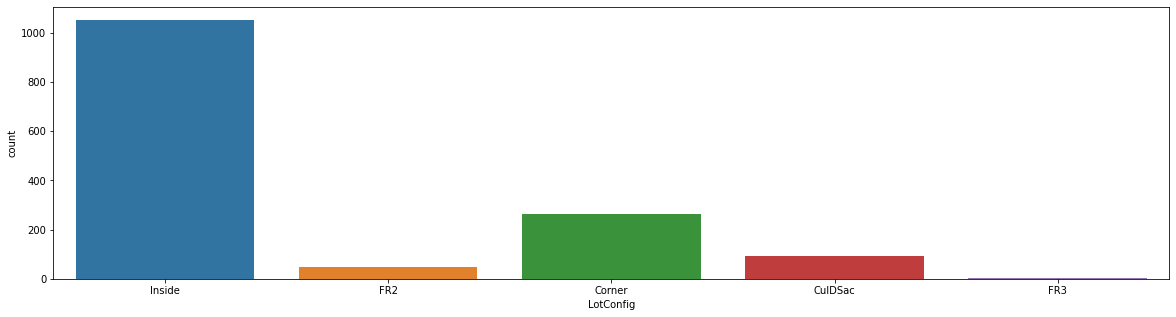

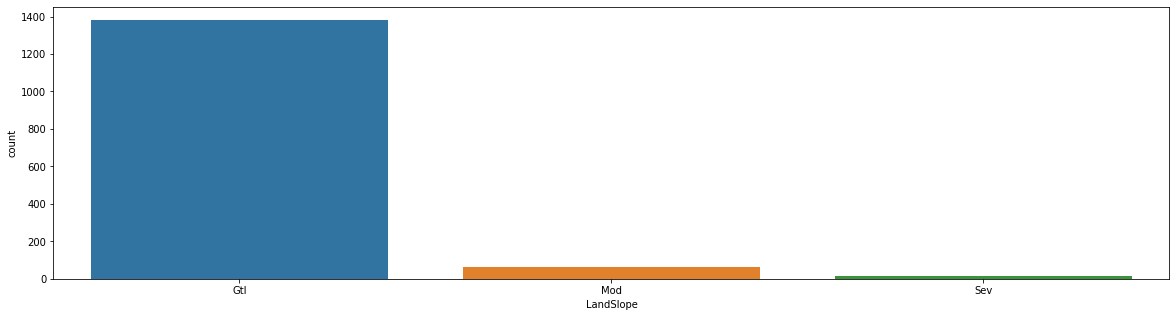

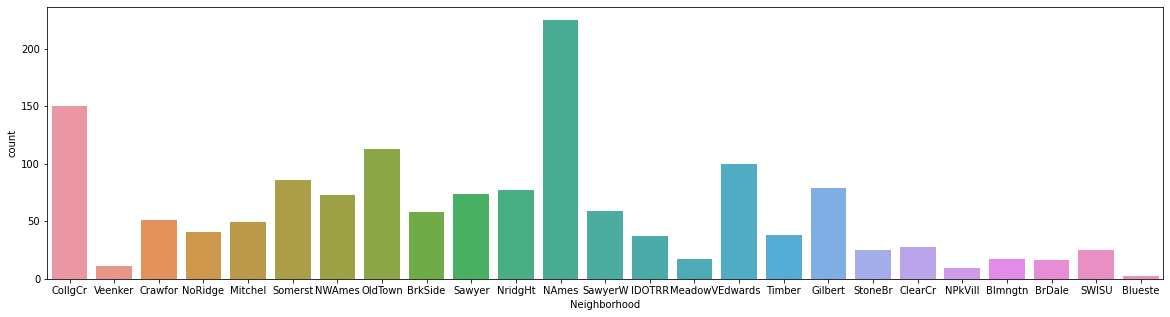

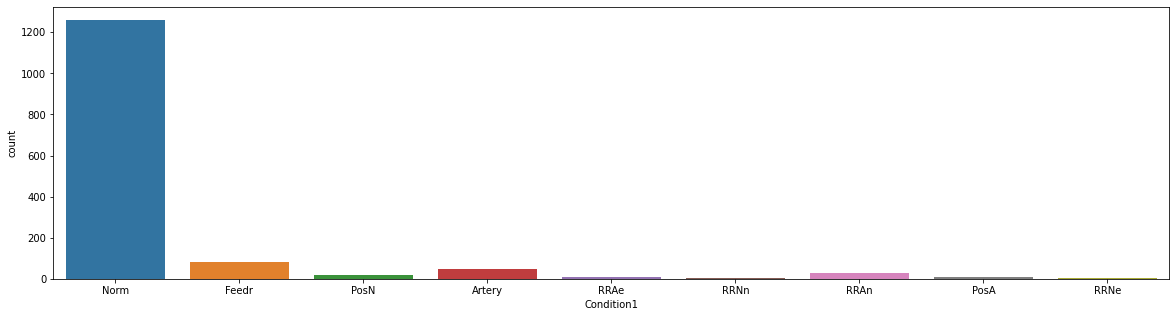

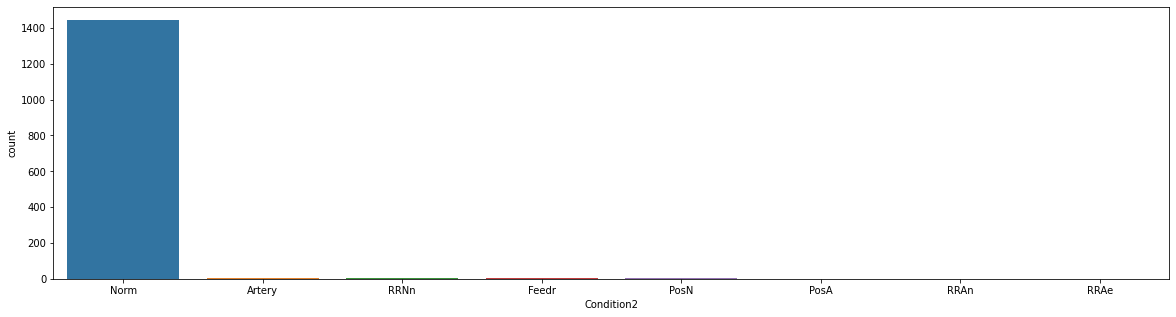

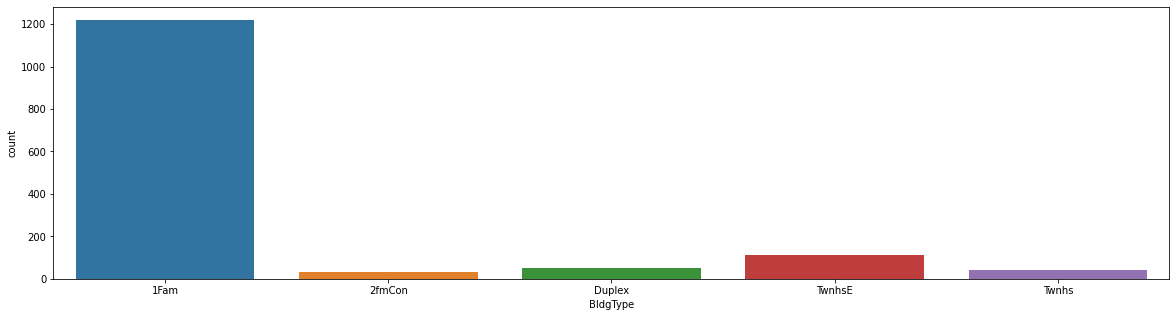

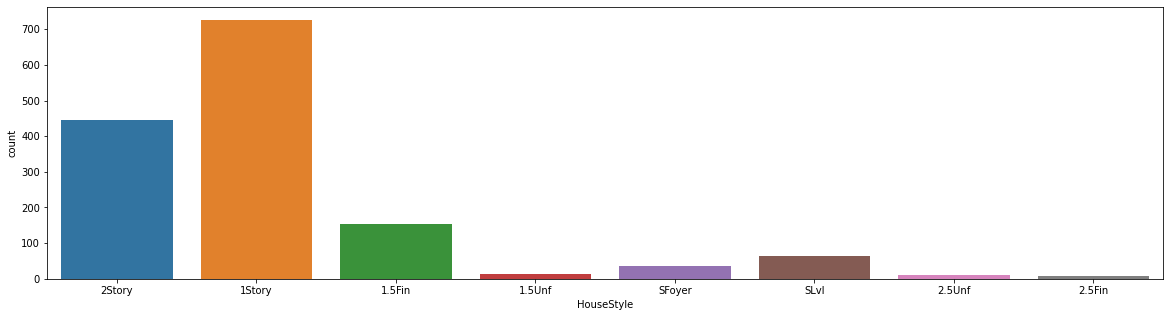

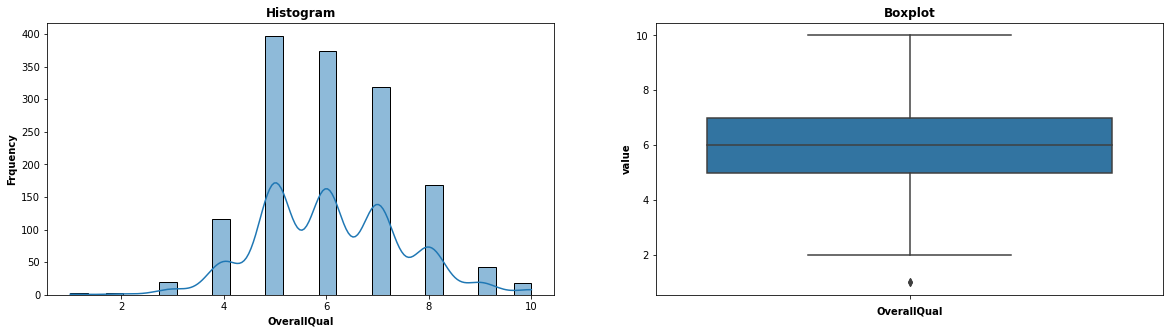

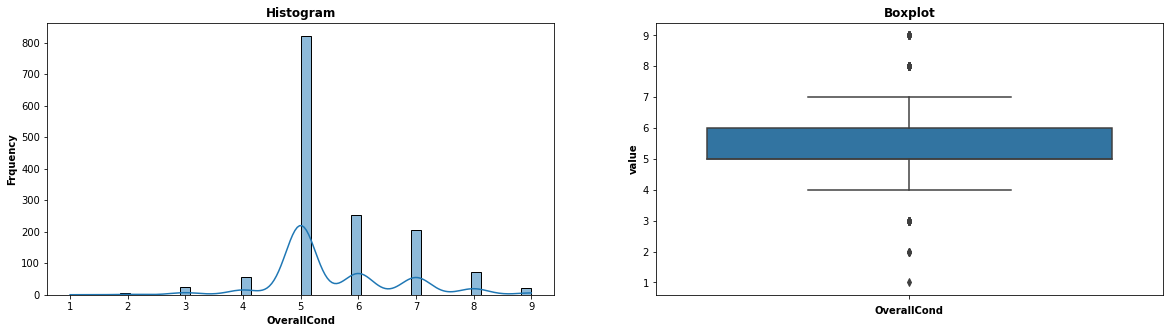

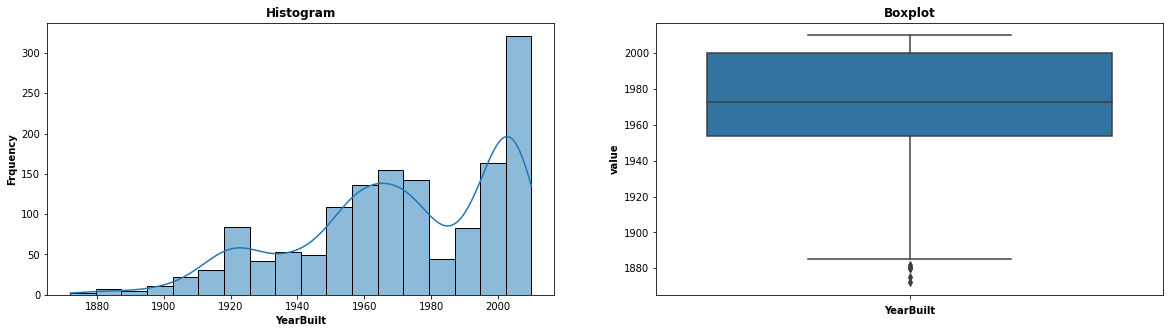

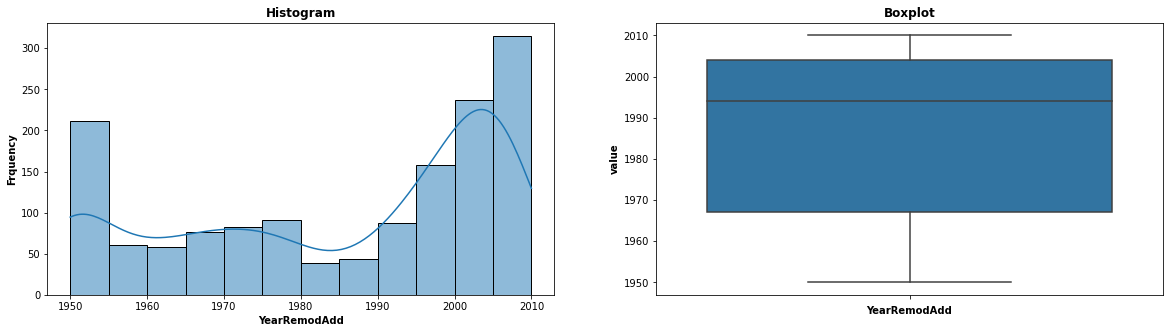

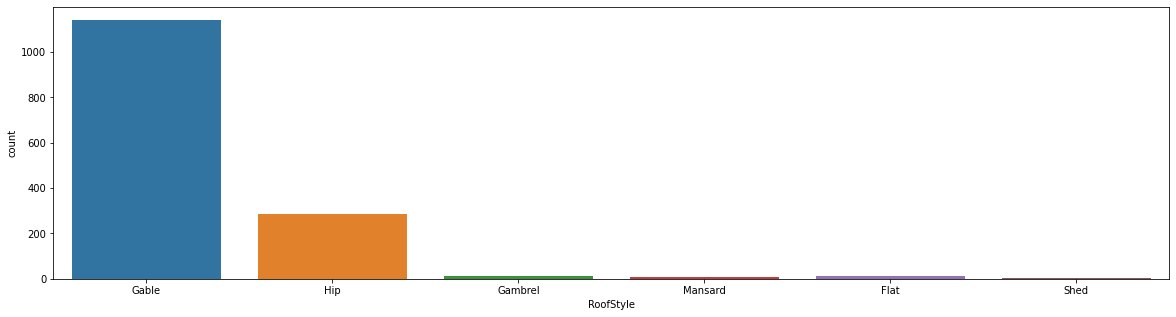

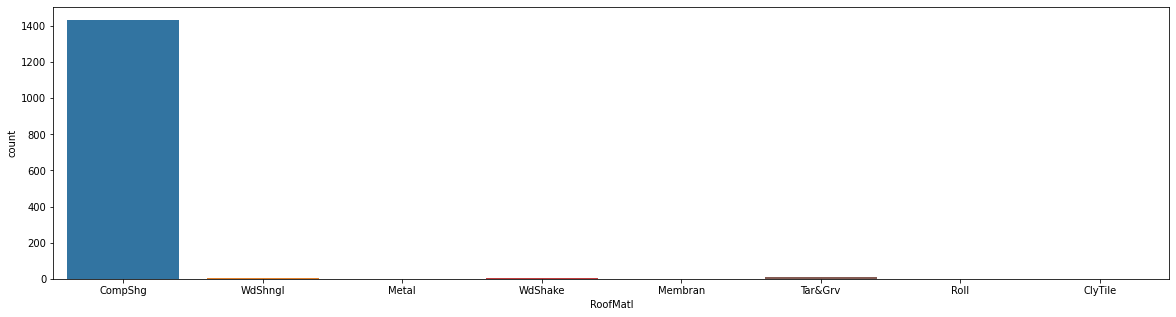

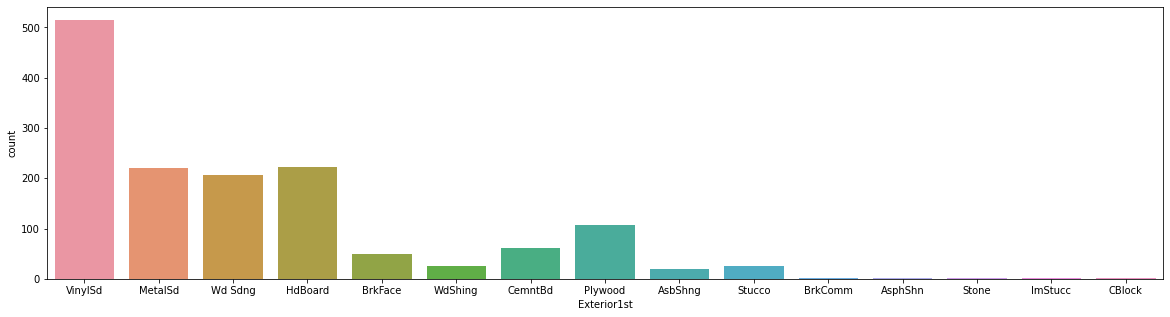

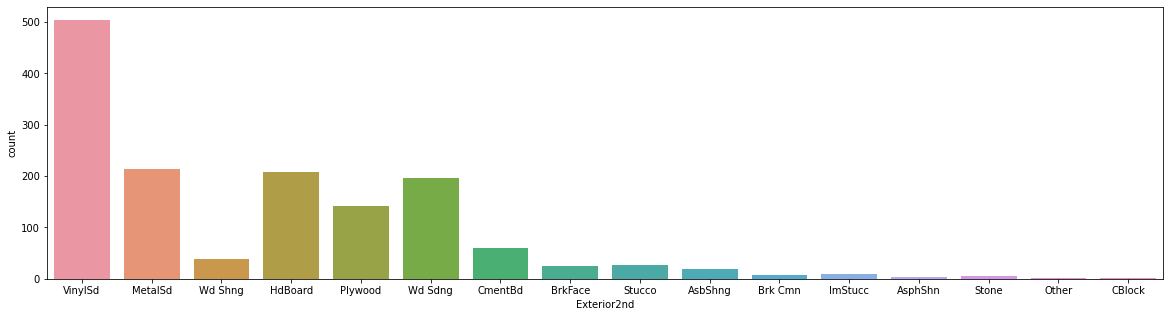

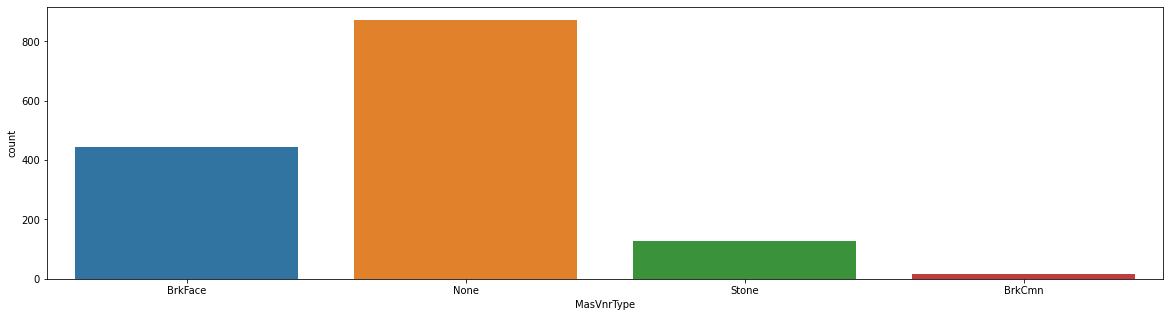

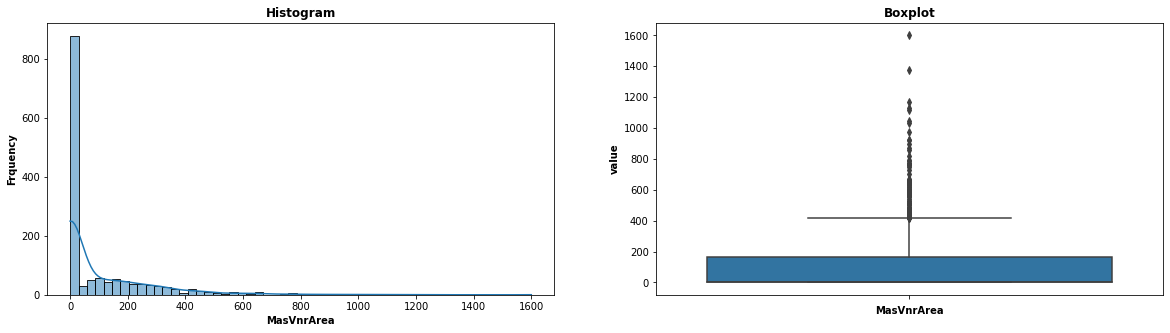

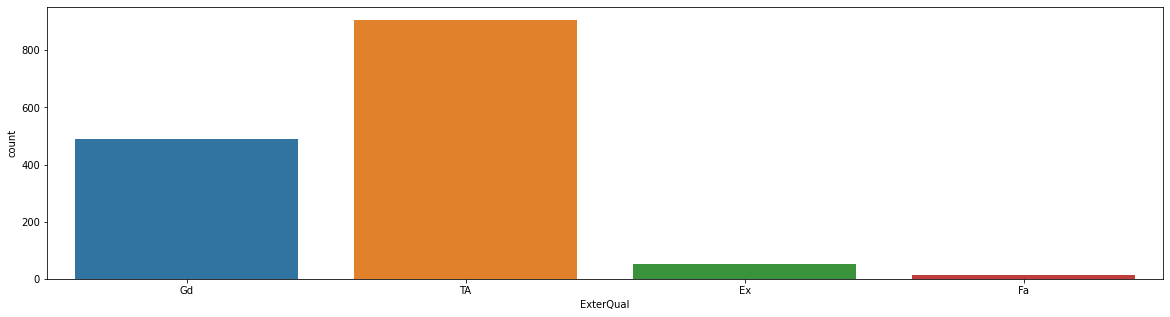

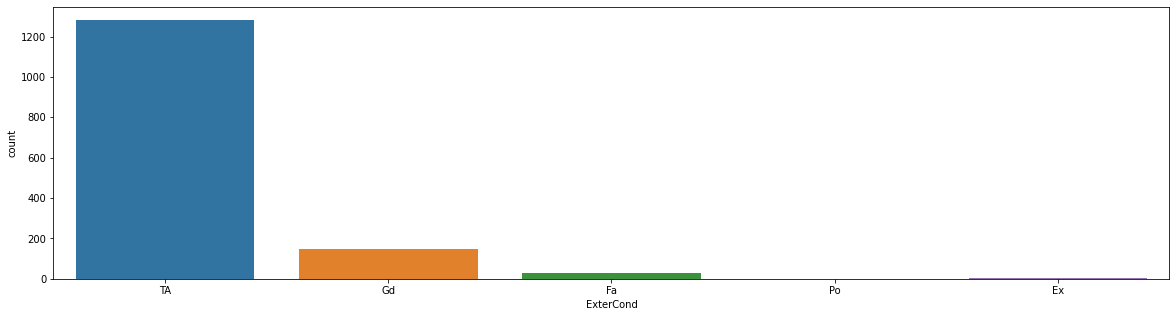

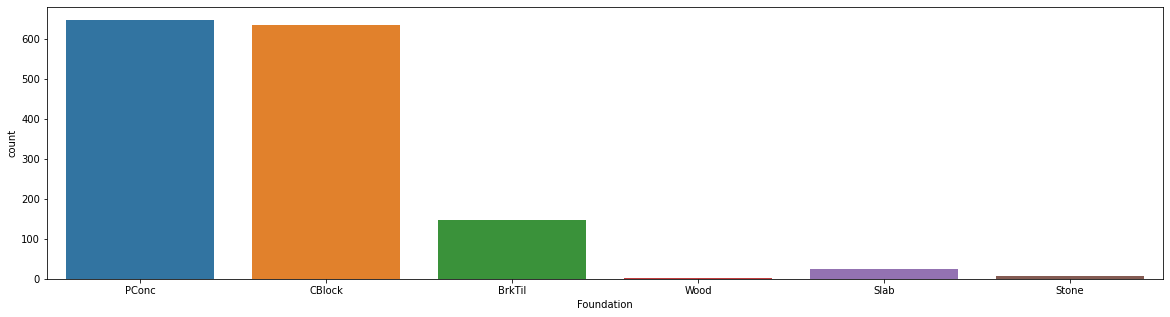

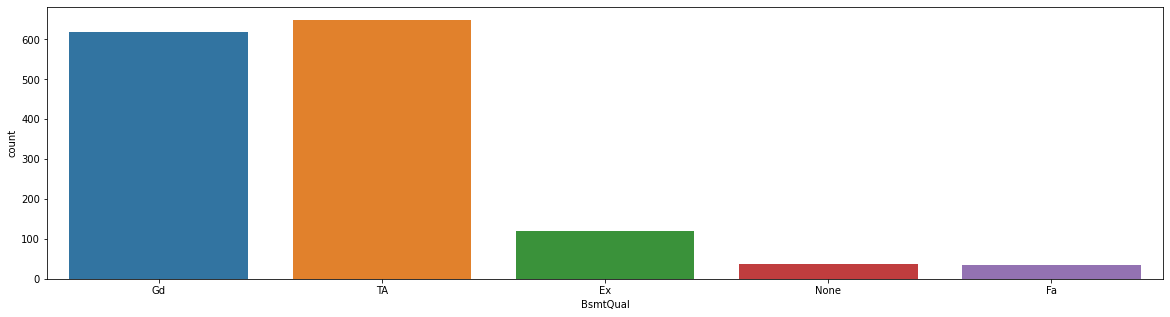

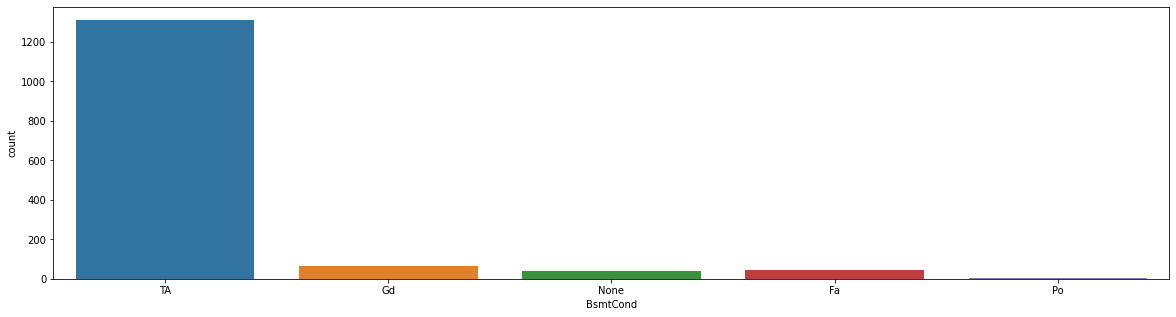

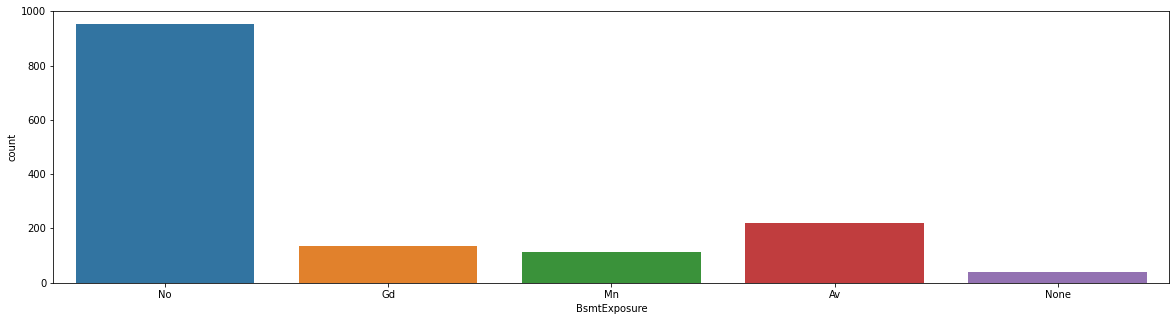

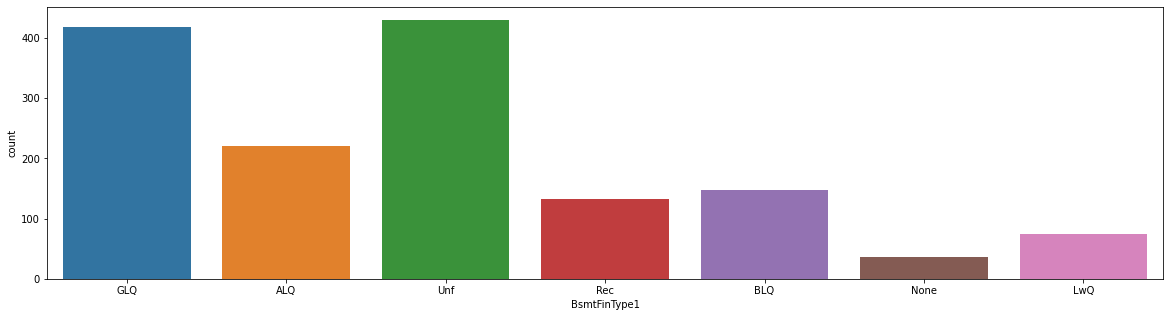

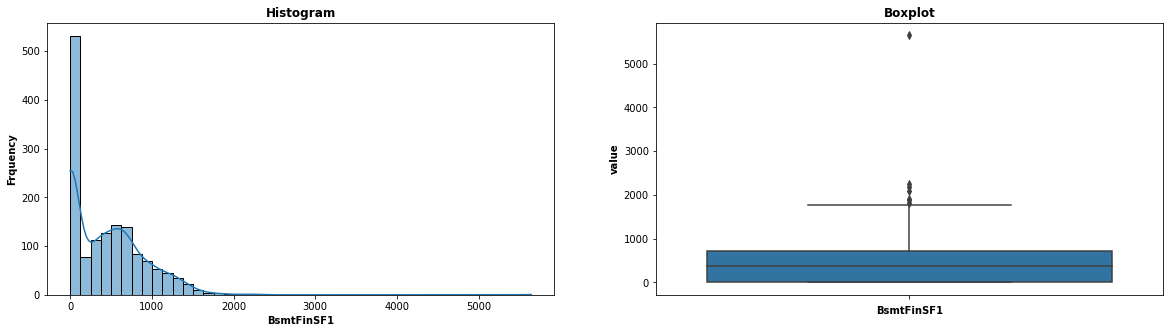

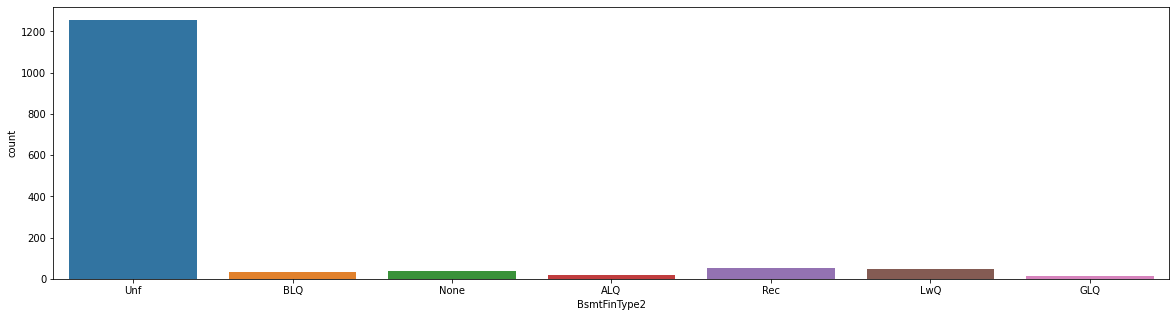

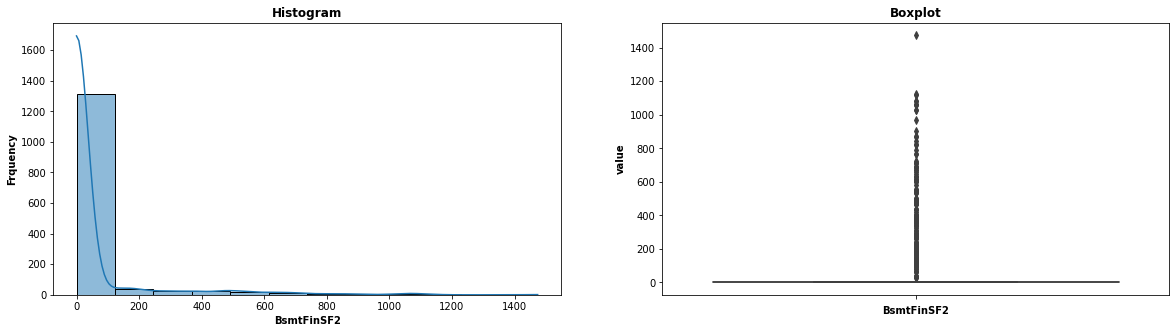

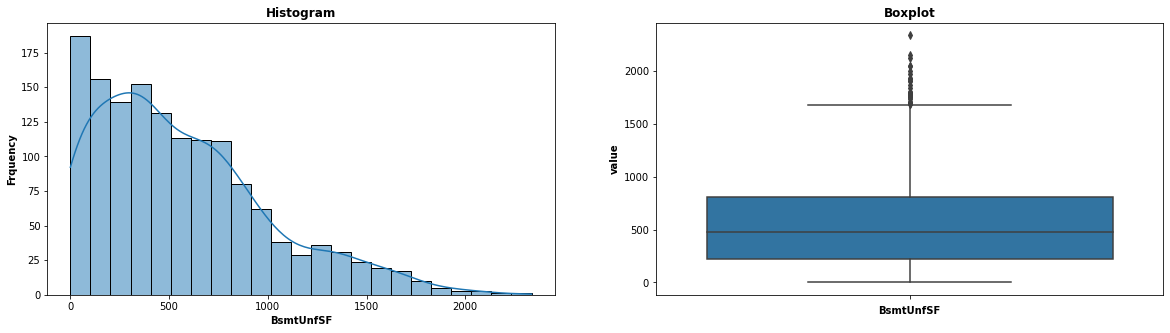

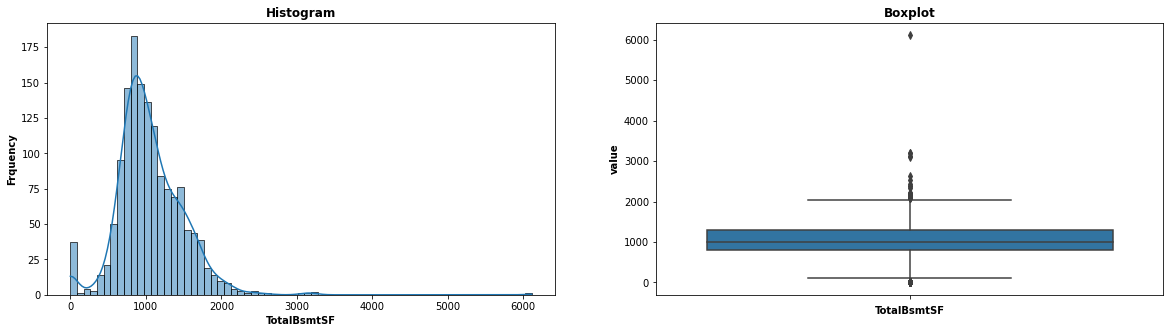

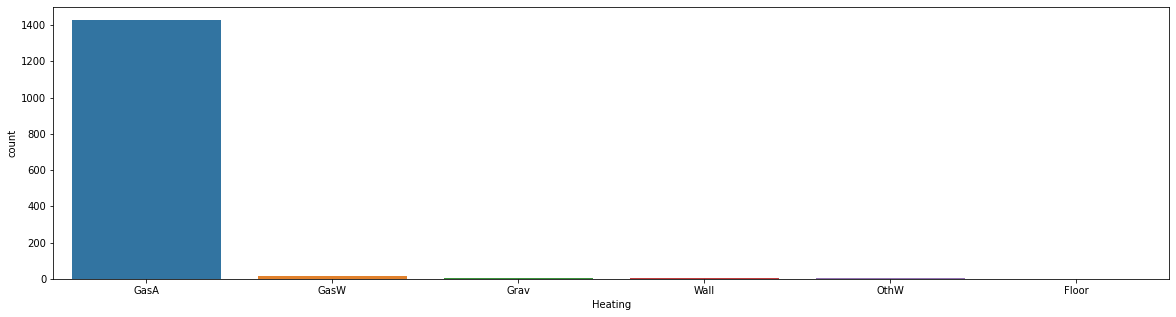

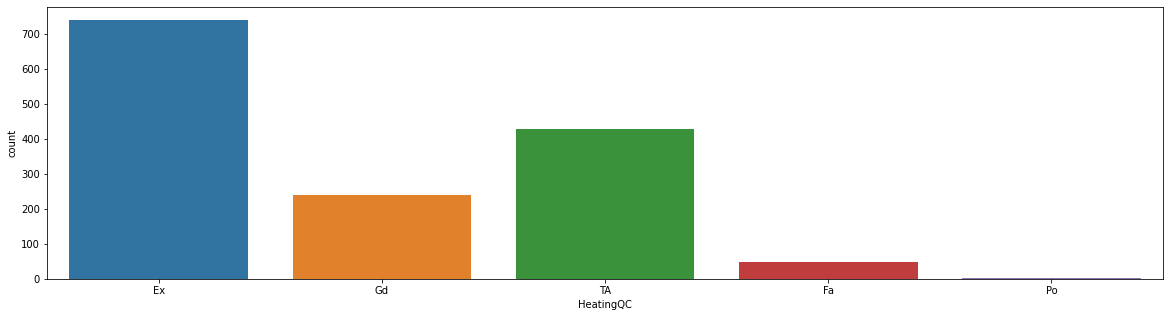

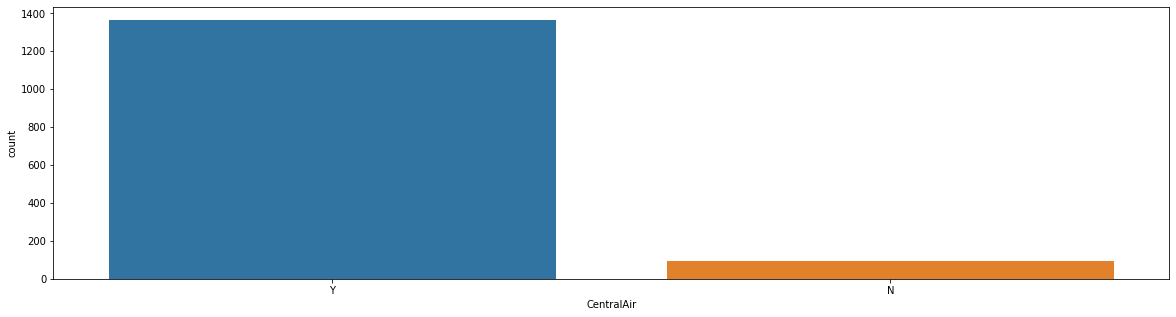

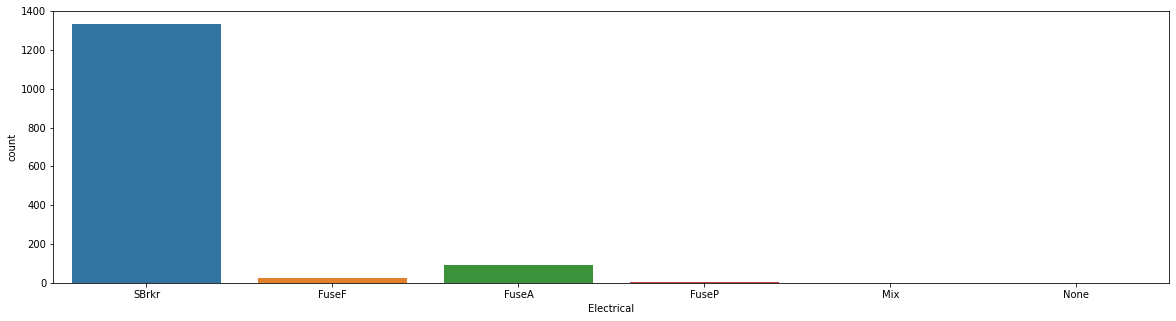

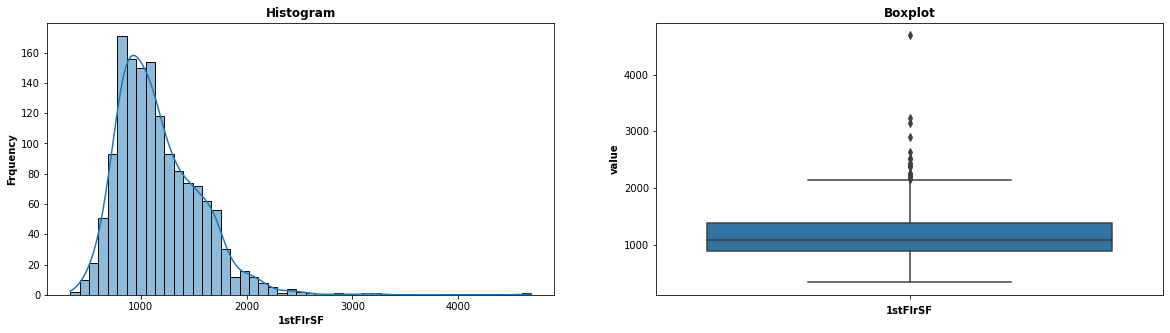

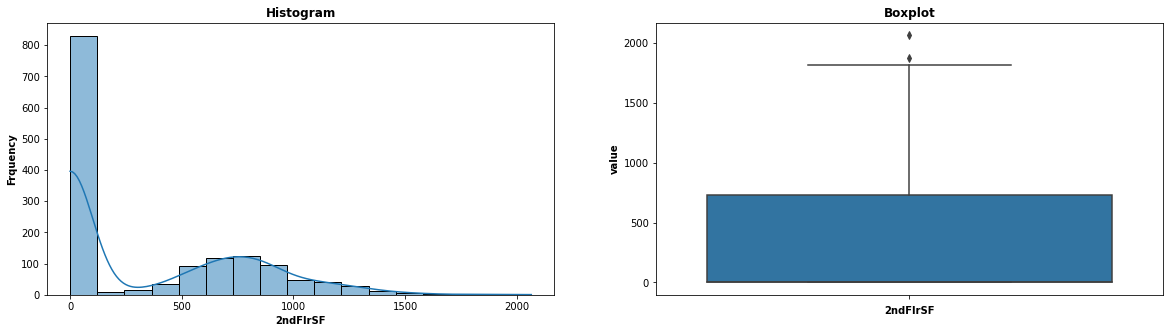

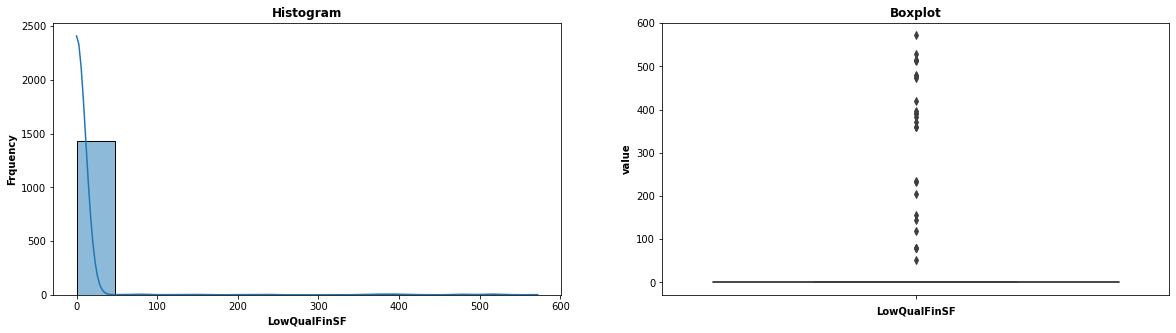

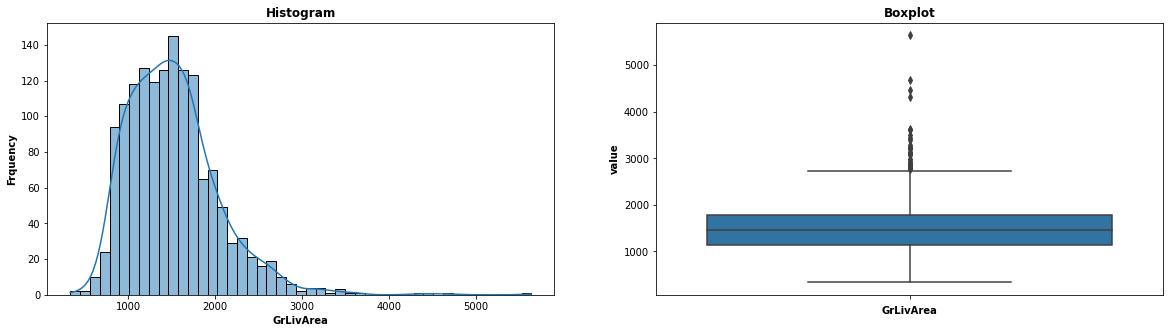

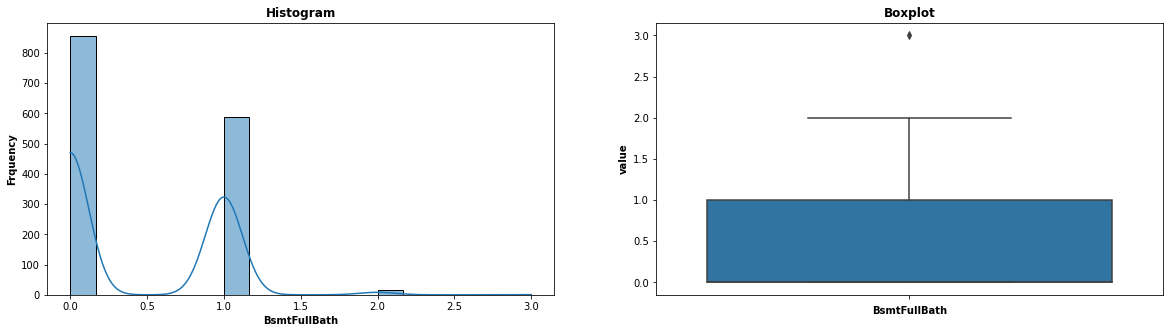

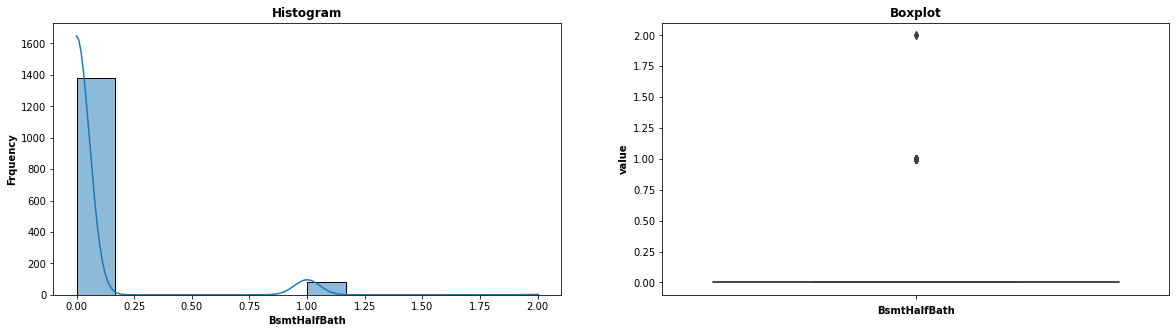

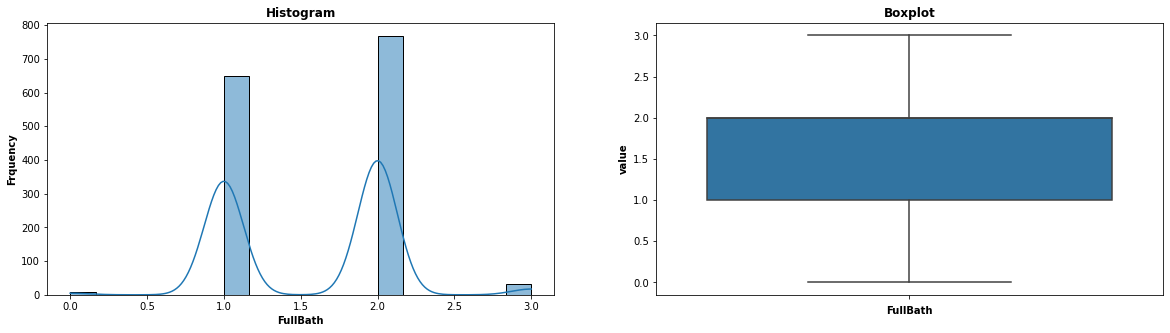

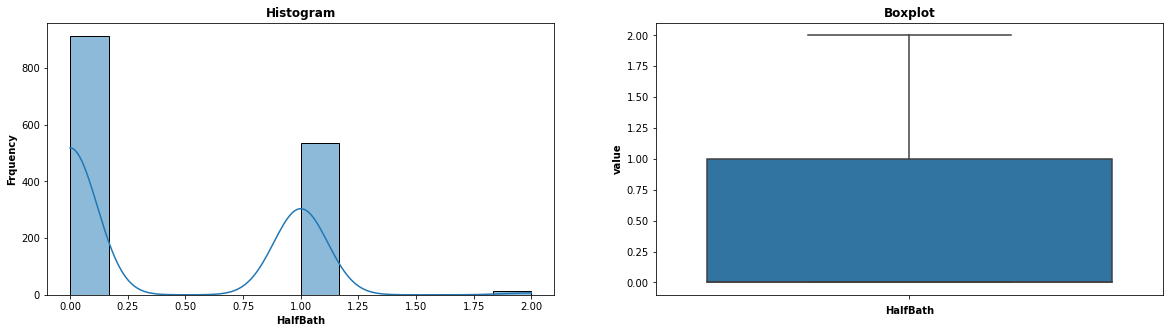

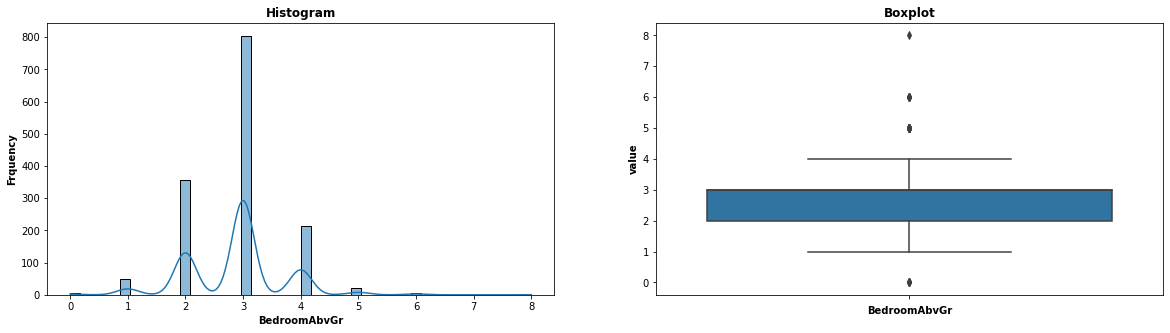

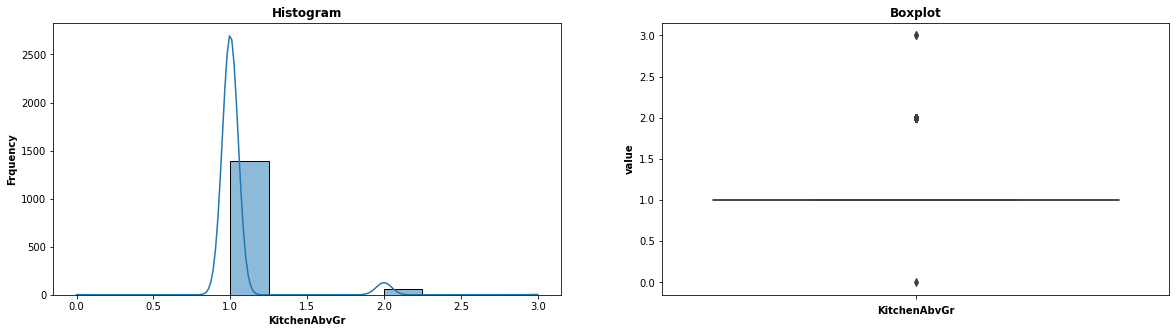

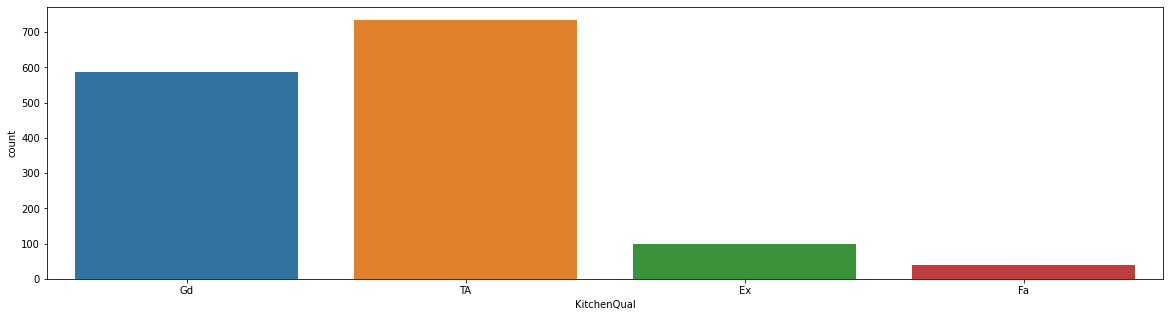

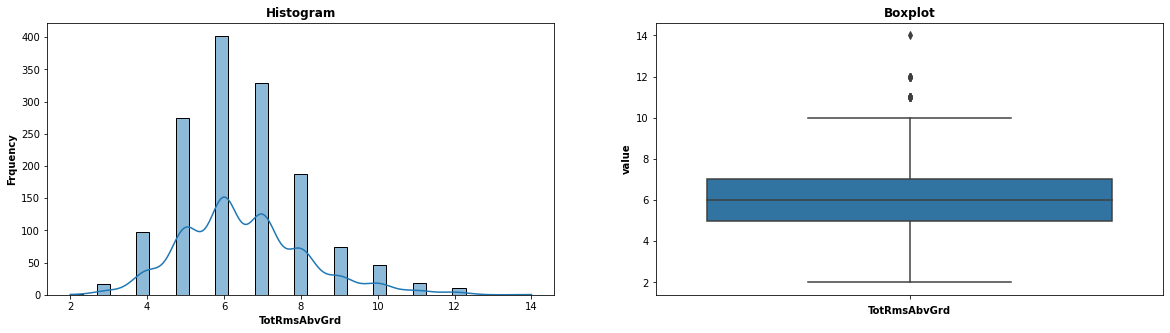

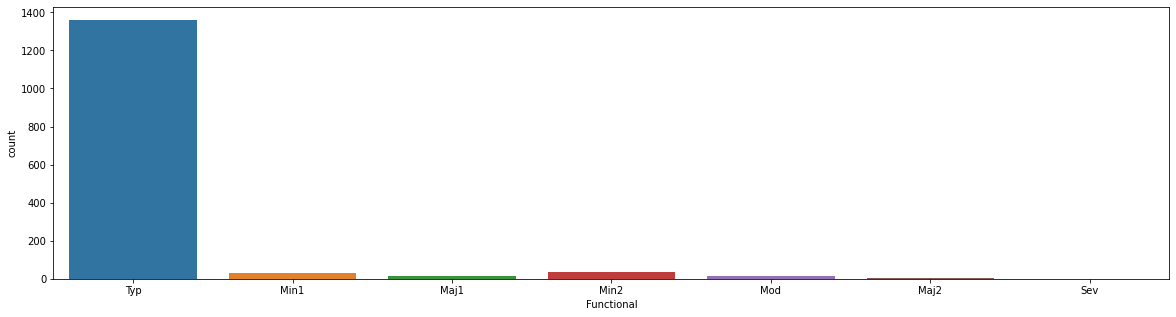

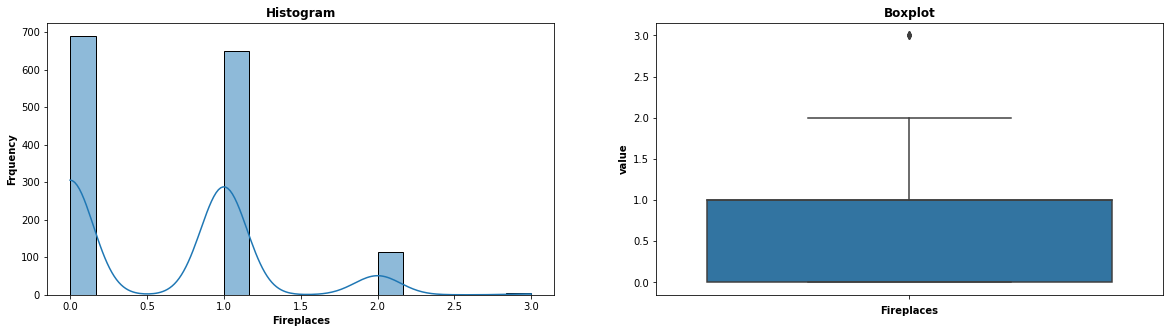

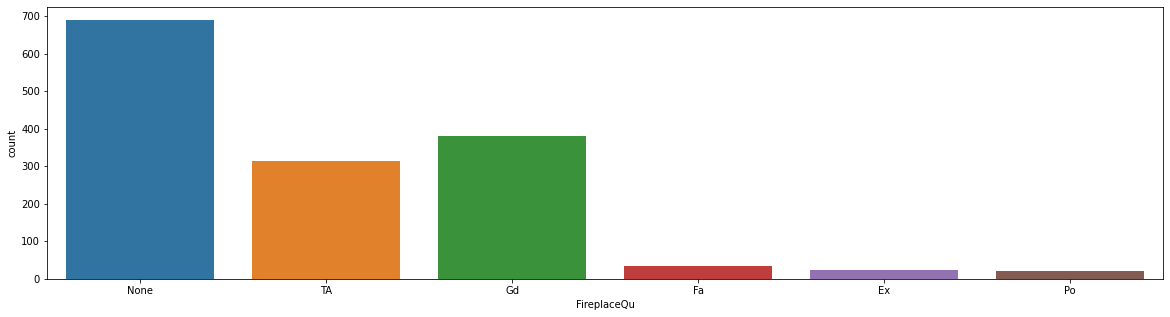

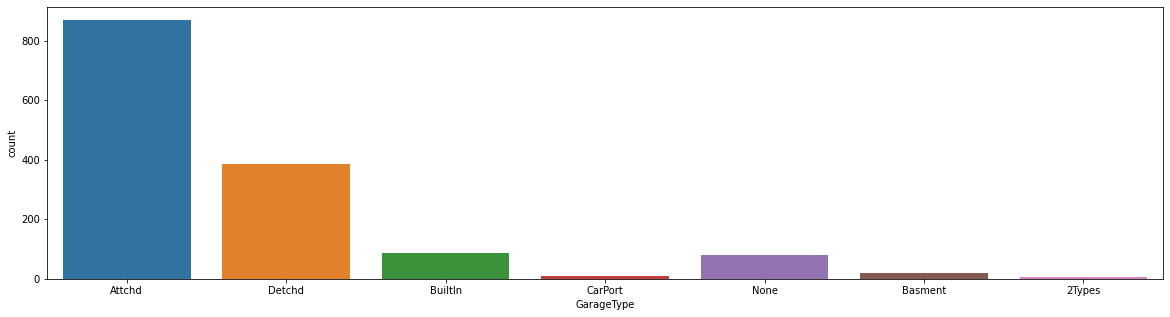

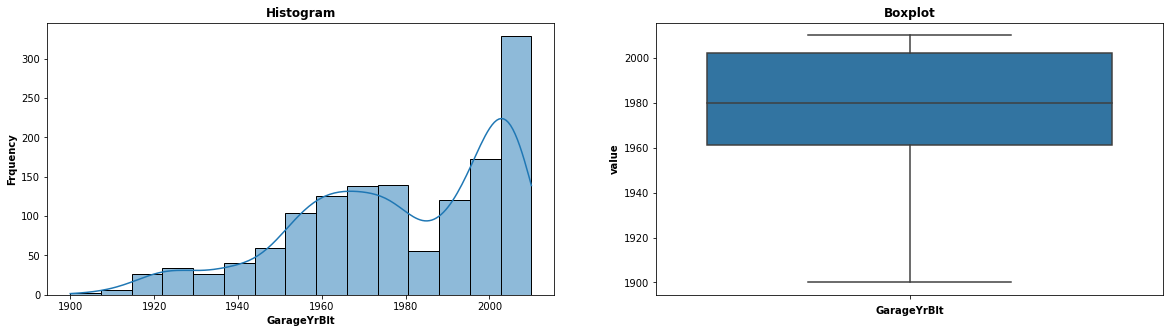

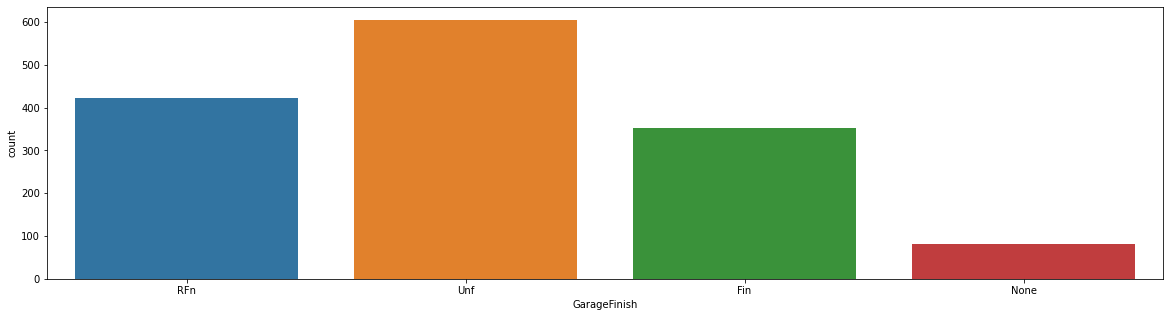

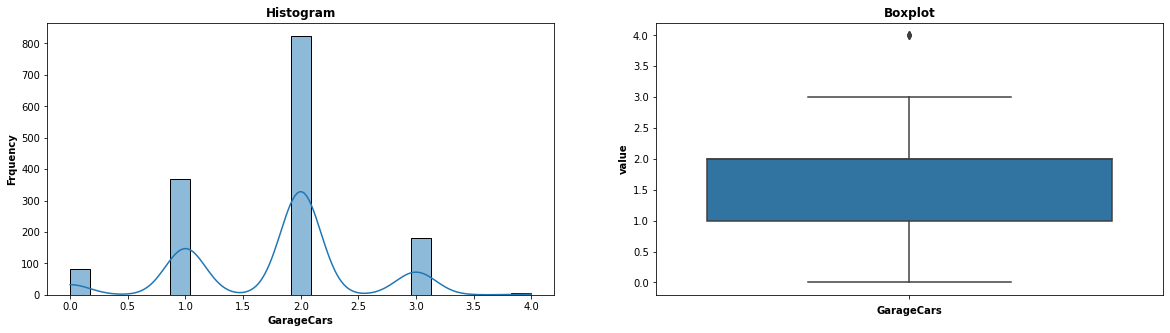

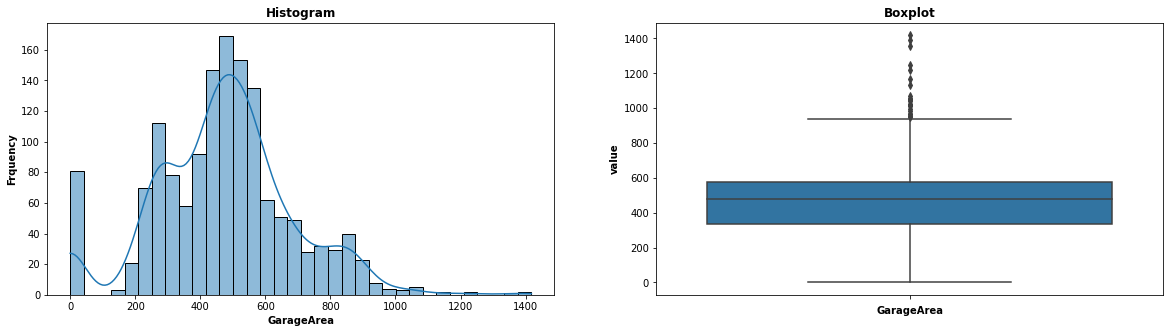

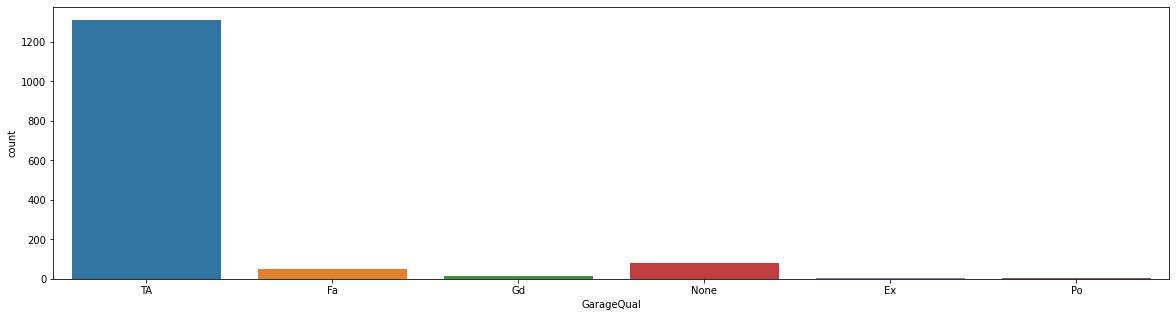

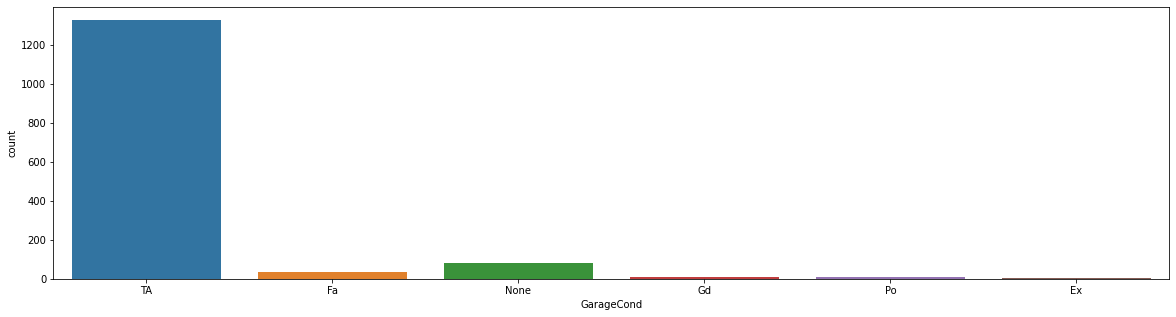

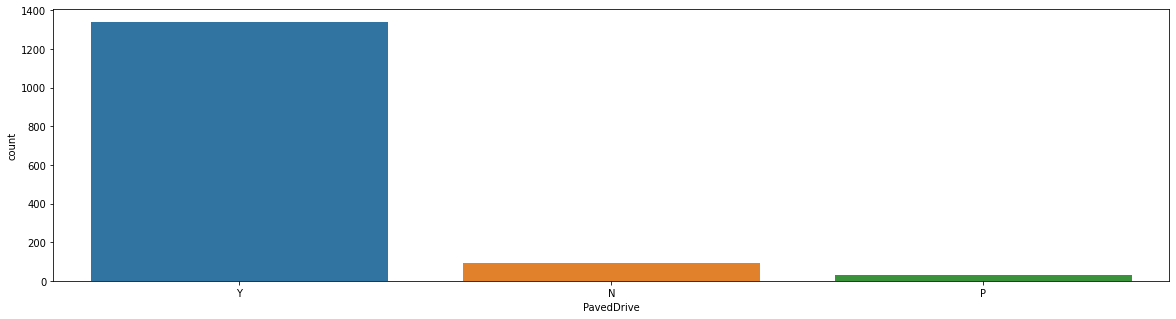

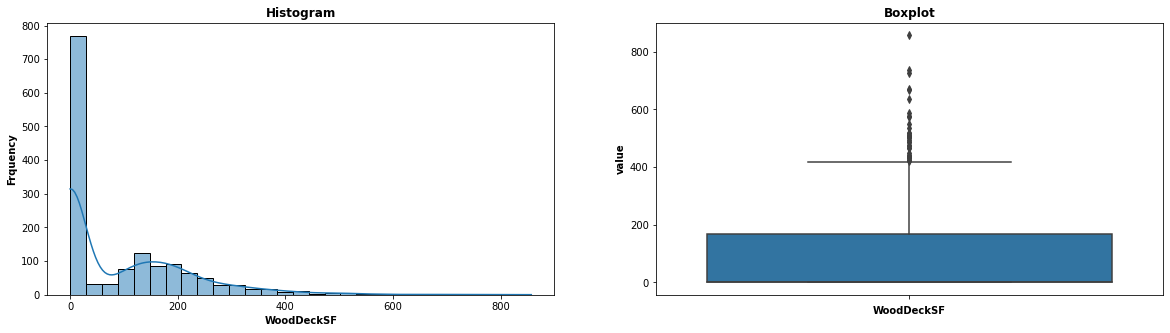

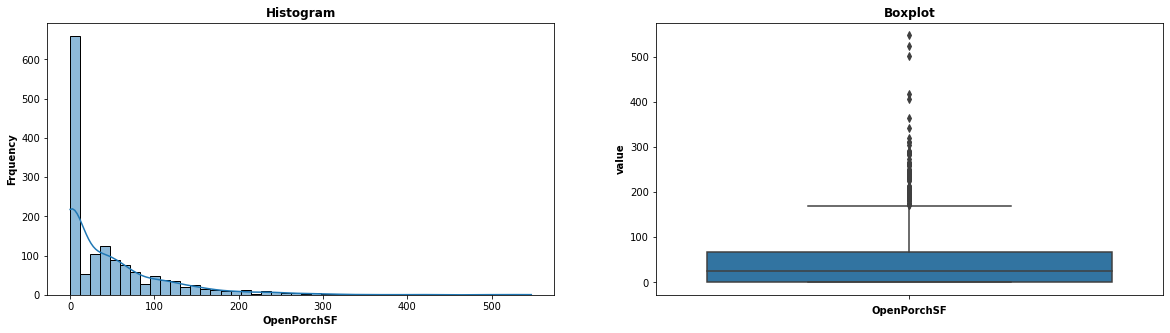

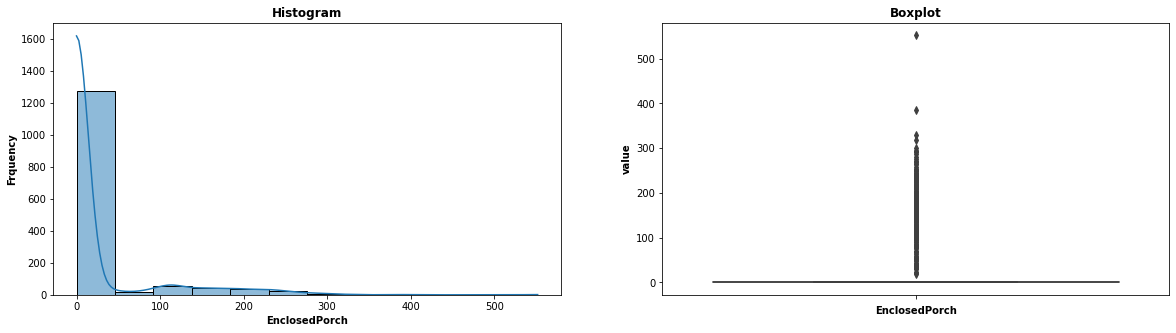

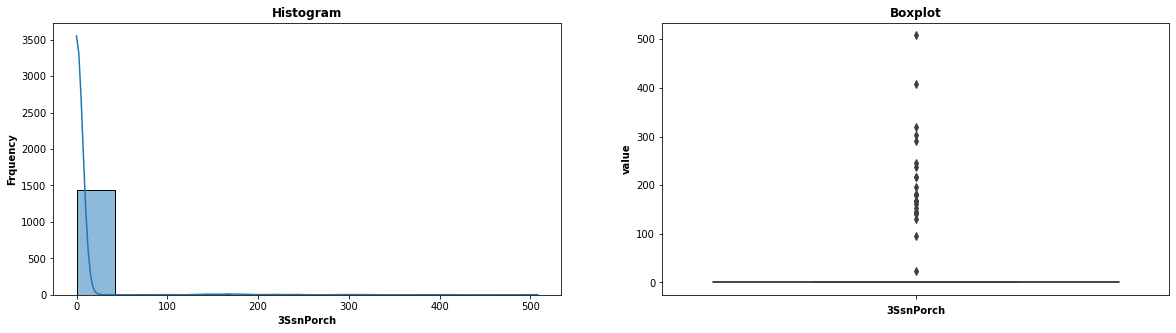

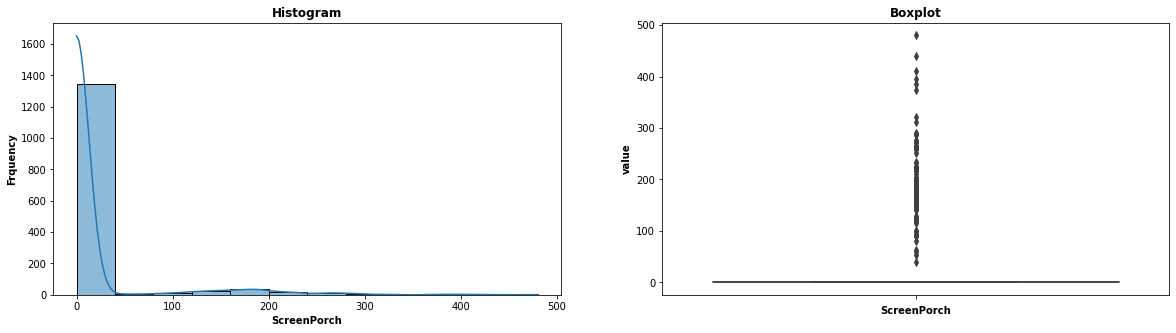

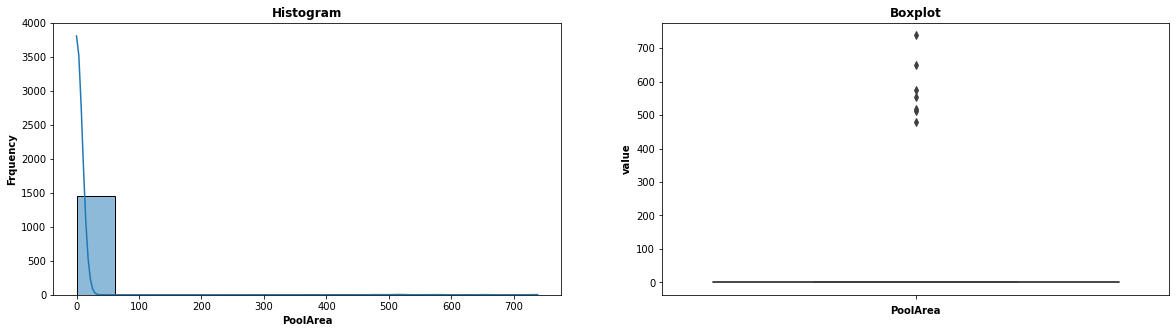

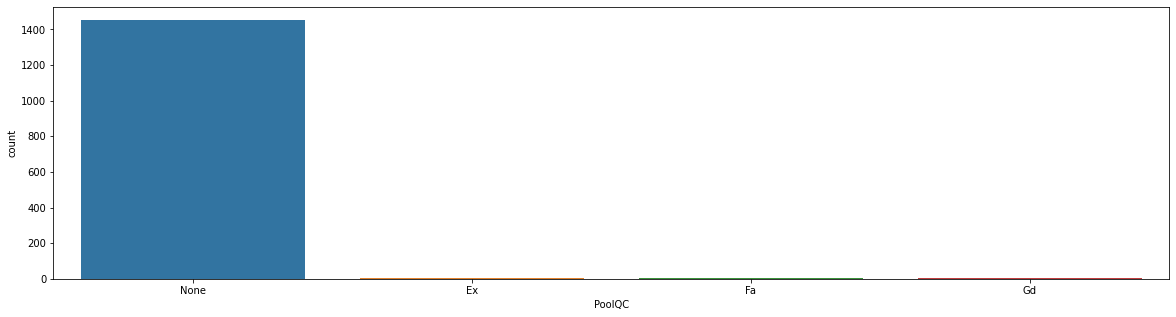

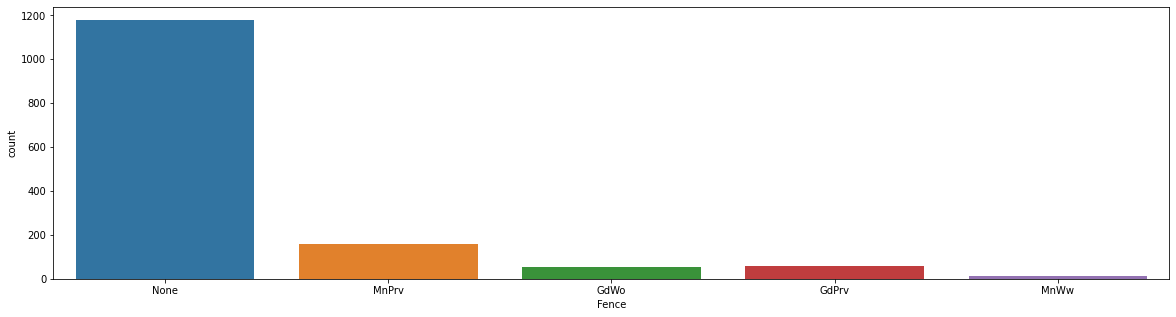

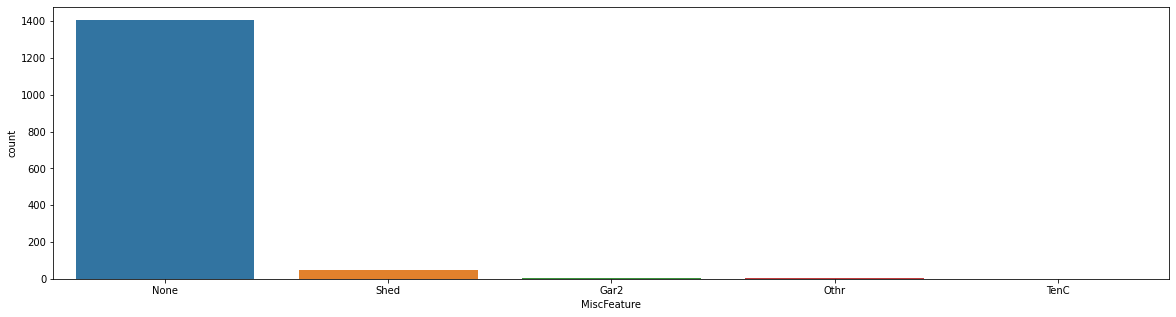

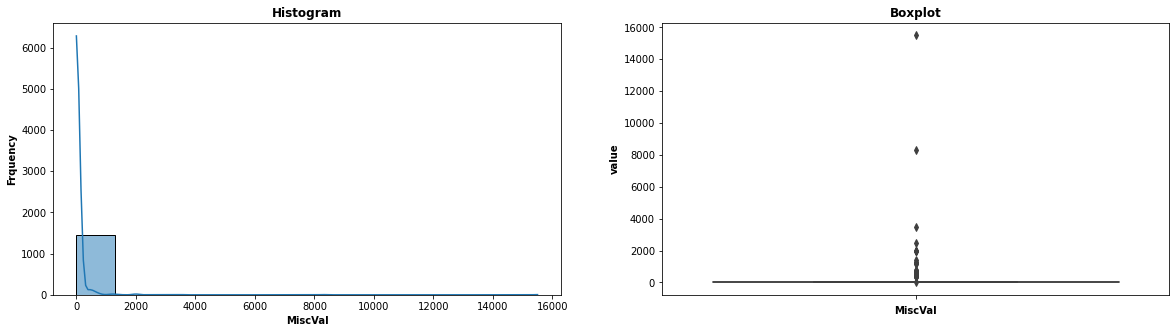

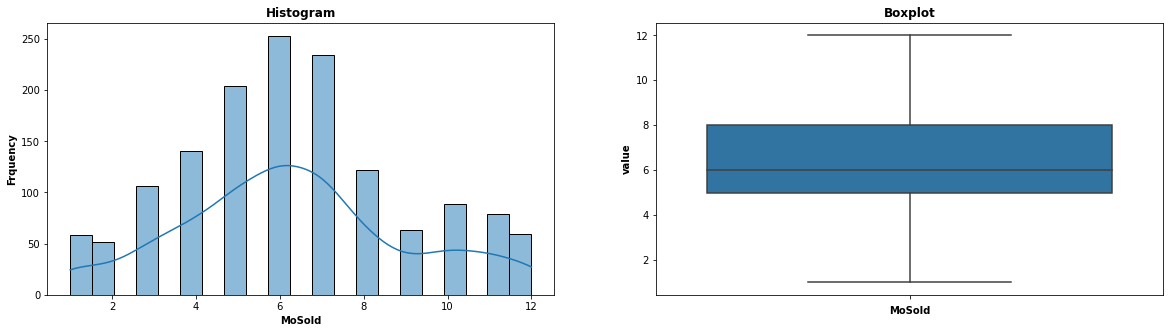

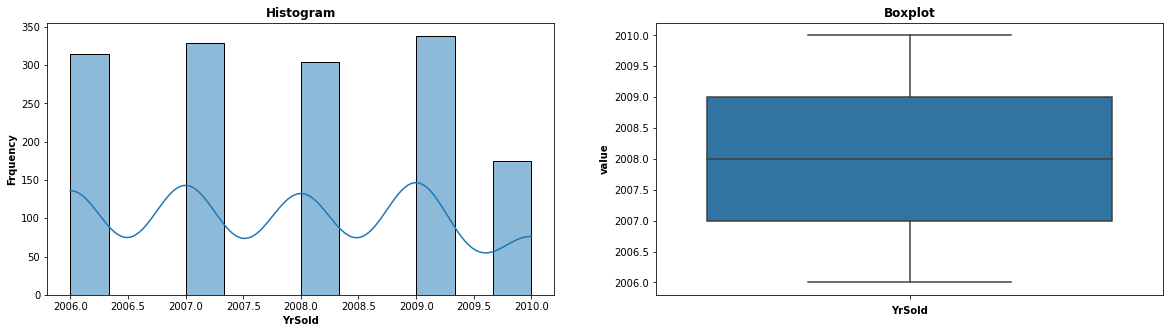

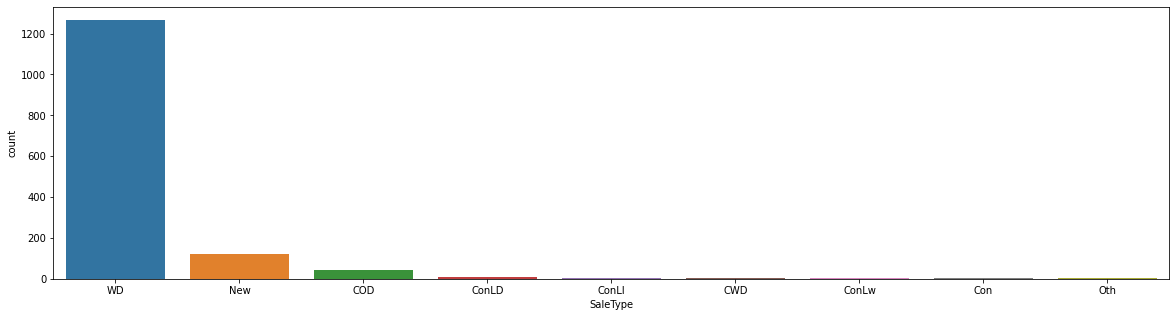

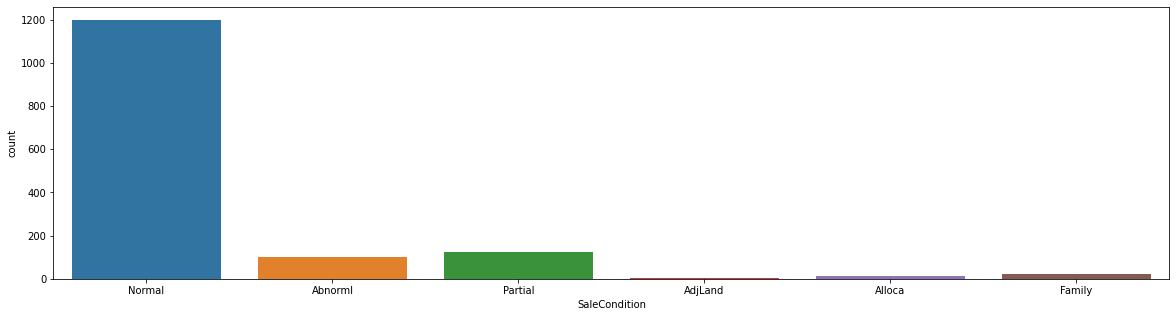

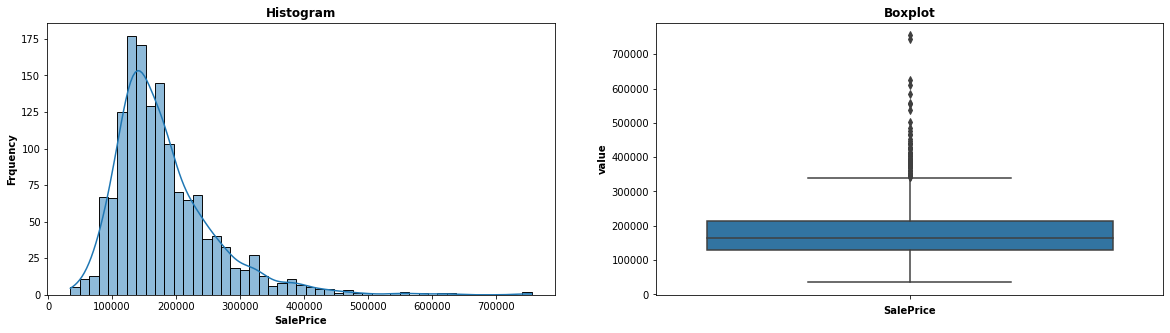

In [16]:
#Creating re-usable code for plotting
def plot_var(i,title1='Histogram',x1label=None,y1label='Frquency',title2='Boxplot',x2label=None,
             y2label='value',fig=(20,5),hue=None):
    if hue==None:
        plt.figure(figsize=fig)
        plt.subplot(1,2,1)
        fig_1=sns.histplot(data=df,x=i,hue=hue,kde=True)
        fig_1.set_title(title1,color='black',fontweight='bold')
        fig_1.set_xlabel(i, color='black',fontweight='bold')
        fig_1.set_ylabel(y1label ,color='black',fontweight='bold')

        plt.subplot(1,2,2)
        fig_2=sns.boxplot(data=df,y=i,x=hue)
        fig_2.set_title(title2,color='black',fontweight='bold')
        fig_2.set_xlabel(i, color='black',fontweight='bold')
        fig_2.set_ylabel(y2label ,color='black',fontweight='bold')
        plt.show()
    else:
        plt.figure(figsize=fig)
        plt.subplot(1,2,1)
        fig_1=sns.histplot(data=df,x=i,hue=hue)
        fig_1.set_title(title1,color='black',fontweight='bold')
        fig_1.set_xlabel(i, color='black',fontweight='bold')
        fig_1.set_ylabel(y1label ,color='black',fontweight='bold')

        plt.subplot(1,2,2)
        fig_2=sns.boxplot(data=df,y=i,x=hue)
        fig_2.set_title(title2,color='black',fontweight='bold')
        fig_2.set_xlabel(hue, color='black',fontweight='bold')
        fig_2.set_ylabel(y2label ,color='black',fontweight='bold')
        plt.show()
        
for col in df.columns:
    if df[col].dtype=='O':
        plt.figure(figsize=(20,5))
        sns.countplot(data=df,x=df[col])
        plt.show()
    else:
        plot_var(col)

In [17]:
#Skewness: Top 5 left skewed columns 
df.skew(axis=0).sort_values(ascending=False).head(5)

MiscVal        24.48
PoolArea       14.83
LotArea        12.21
3SsnPorch      10.30
LowQualFinSF    9.01
dtype: float64

In [18]:
#Kurtosis:Peakness of the curve
df.kurt(axis=0).sort_values(ascending=False).head(5)

MiscVal        701.00
PoolArea       223.27
LotArea        203.24
3SsnPorch      123.66
LowQualFinSF    83.23
dtype: float64

#### Skewness & Kurtosis:
Its observed that many of the numerical columns are left skewed.These are the columns 'MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF' for which the skewness are 24.48, 14.83, 12.21, 10.3 ,  9.01 respectively & kurtosis are 701, 223.27, 203.24, 123.66,  83.23 respectively.

In [19]:
#Highest amount of propotion in each categorical columns
for col in cat_cols:
    print(df[col].value_counts(1,dropna=False).head(1))
    print('-'*50)

None   0.94
Name: Alley, dtype: float64
--------------------------------------------------
1Fam   0.84
Name: BldgType, dtype: float64
--------------------------------------------------
TA   0.90
Name: BsmtCond, dtype: float64
--------------------------------------------------
No   0.65
Name: BsmtExposure, dtype: float64
--------------------------------------------------
Unf   0.29
Name: BsmtFinType1, dtype: float64
--------------------------------------------------
Unf   0.86
Name: BsmtFinType2, dtype: float64
--------------------------------------------------
TA   0.44
Name: BsmtQual, dtype: float64
--------------------------------------------------
Y   0.93
Name: CentralAir, dtype: float64
--------------------------------------------------
Norm   0.86
Name: Condition1, dtype: float64
--------------------------------------------------
Norm   0.99
Name: Condition2, dtype: float64
--------------------------------------------------
SBrkr   0.91
Name: Electrical, dtype: float64
----------

**Categorical Observations- Univariate:**

Highest amount of propotion in each categorical columns is shown above.

For eg:<br>
MSZoning: Residential Low Density zoning classification is high among all the types<br>
Street: Type of road access to property is almost Paved<br>

## Bivariate Analysis

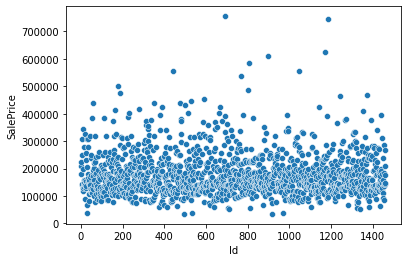

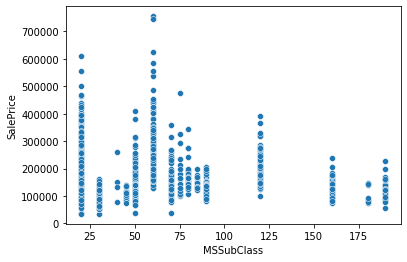

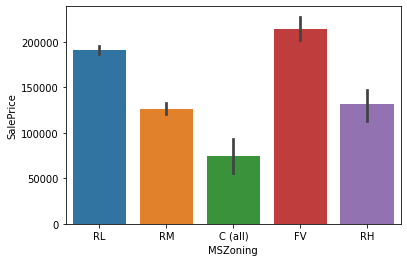

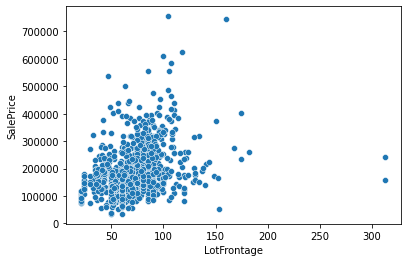

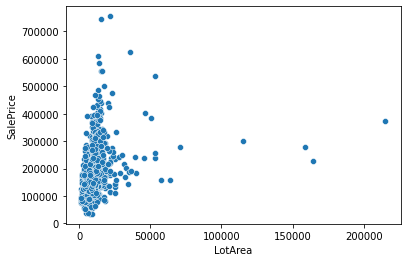

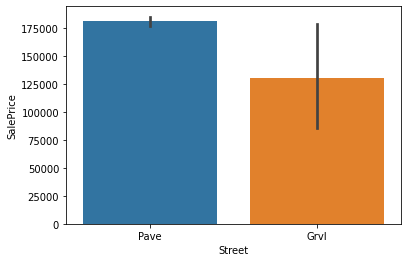

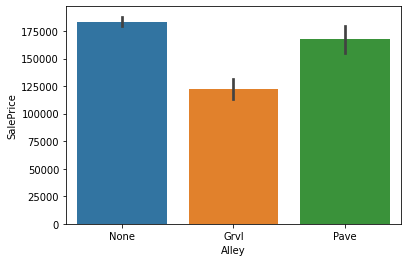

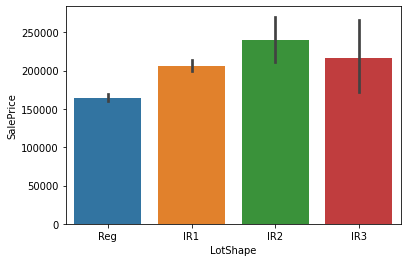

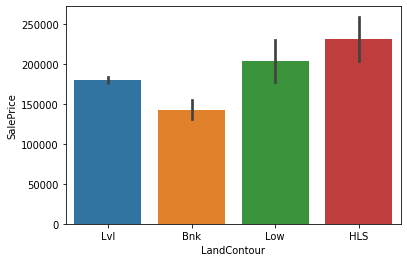

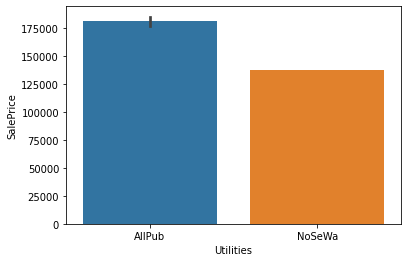

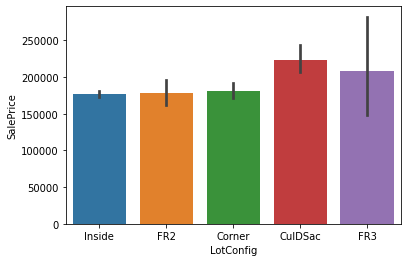

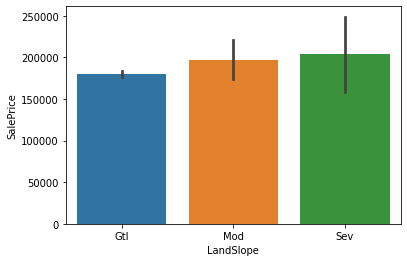

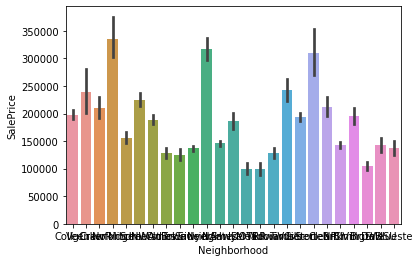

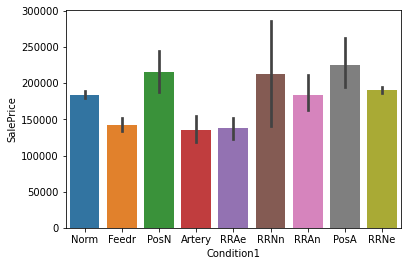

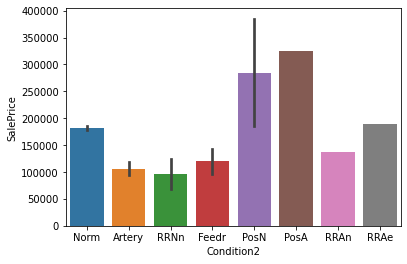

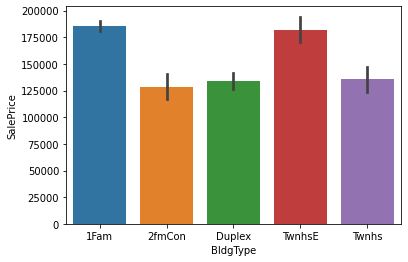

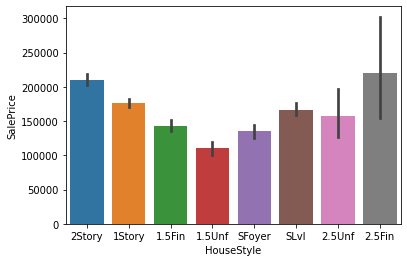

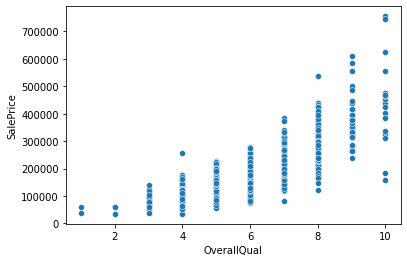

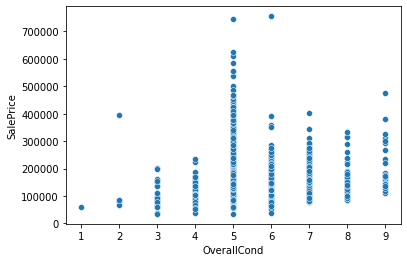

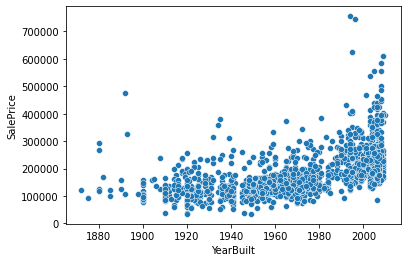

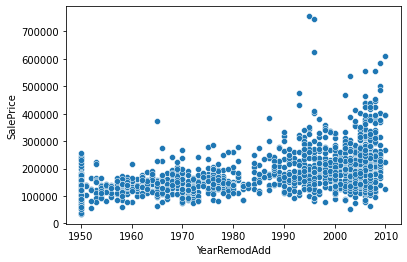

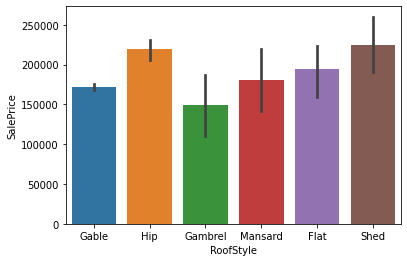

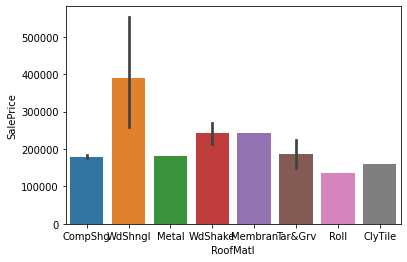

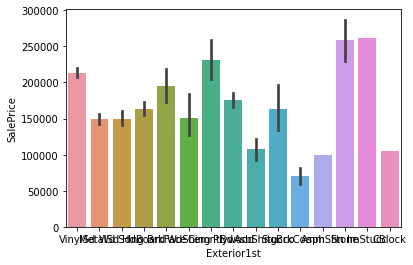

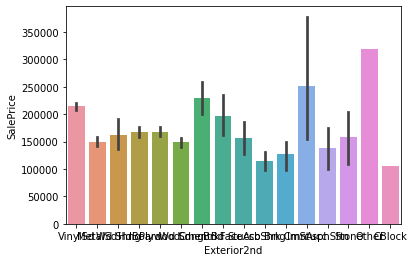

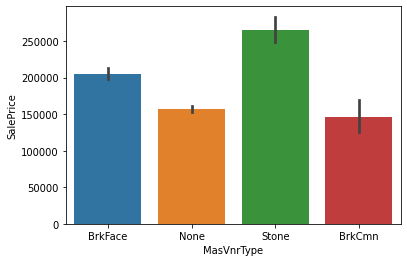

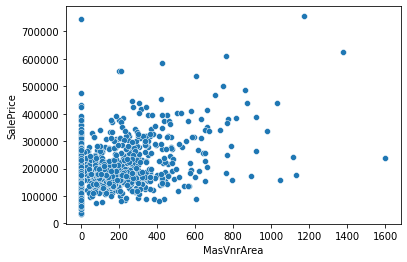

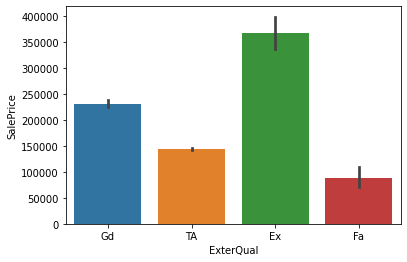

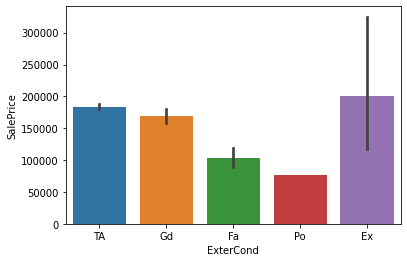

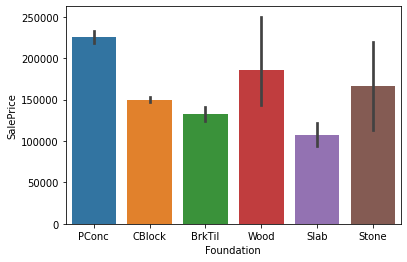

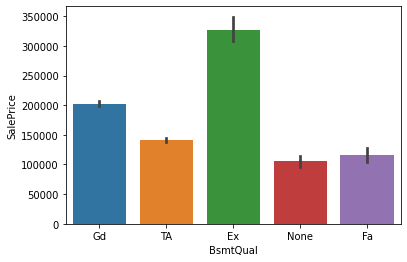

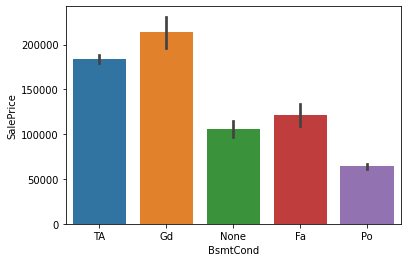

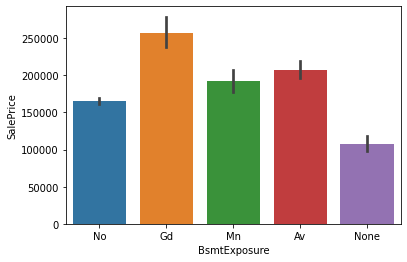

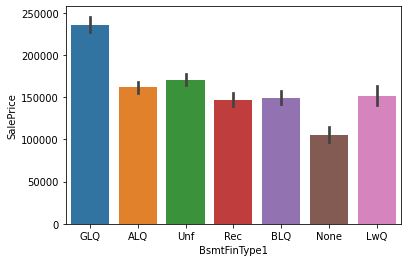

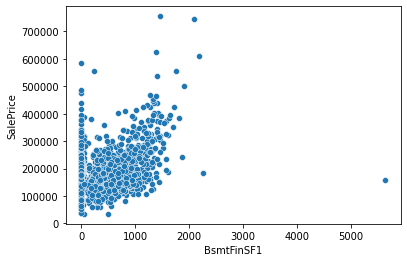

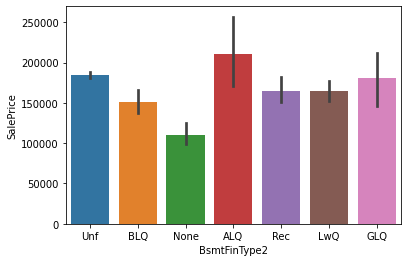

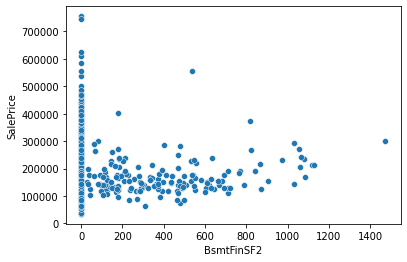

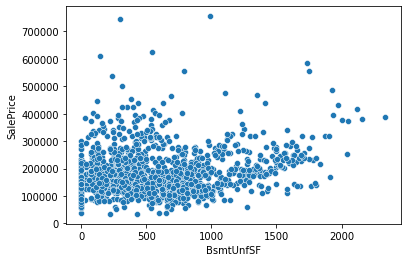

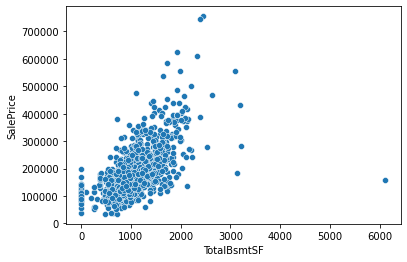

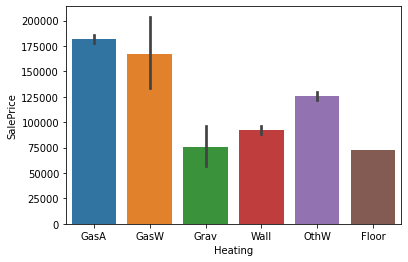

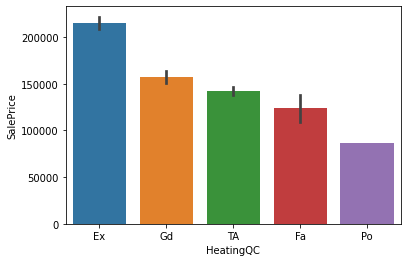

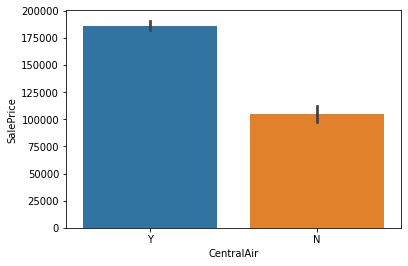

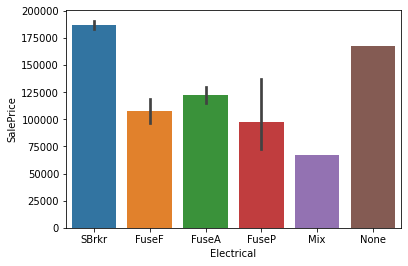

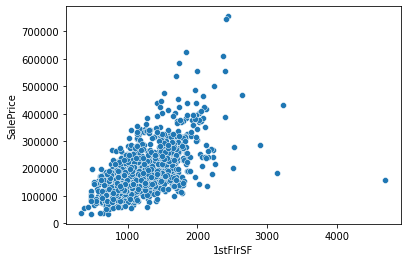

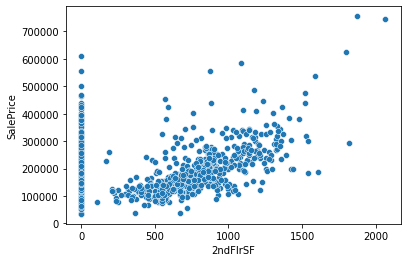

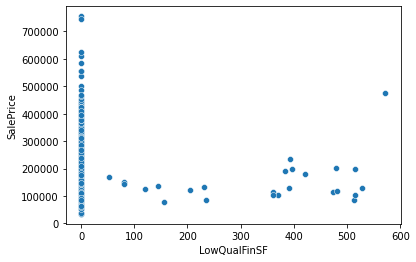

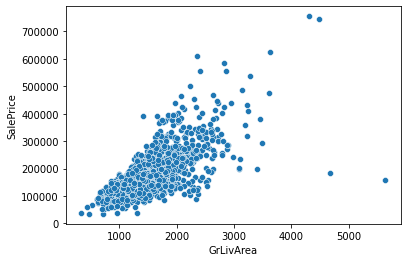

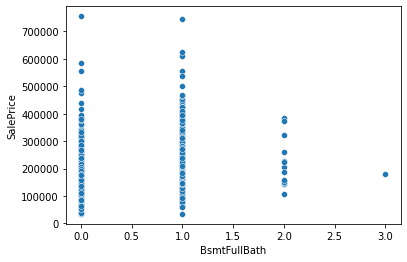

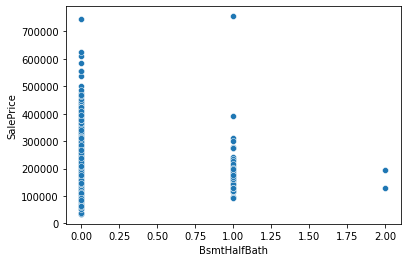

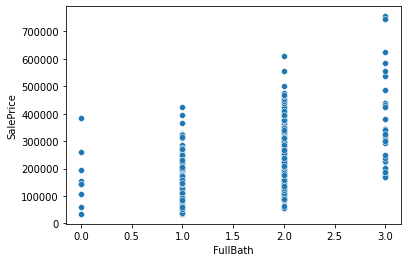

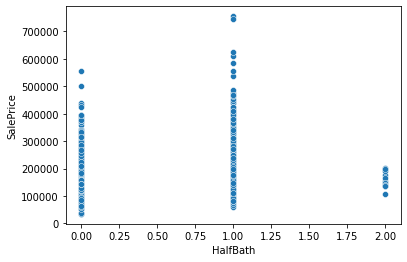

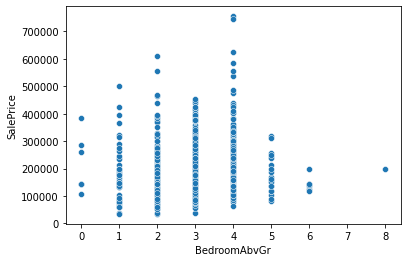

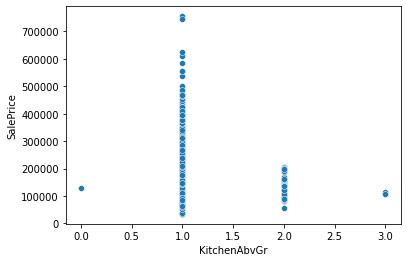

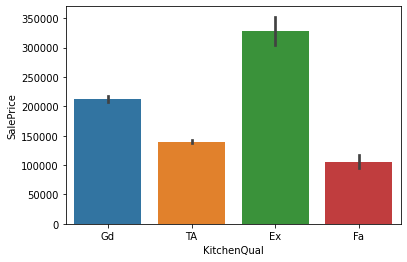

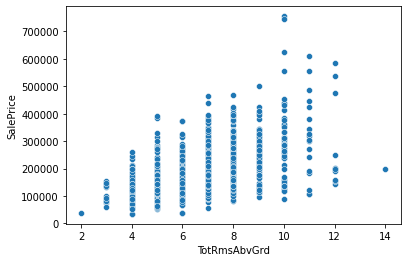

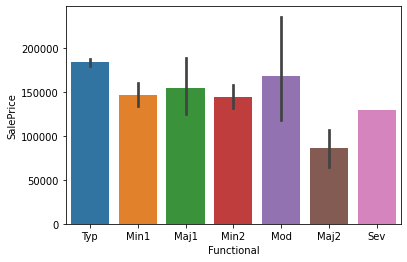

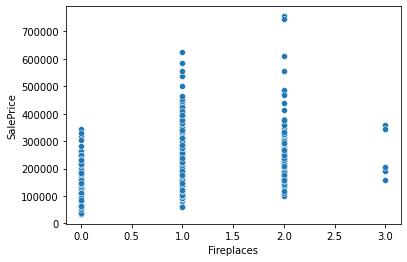

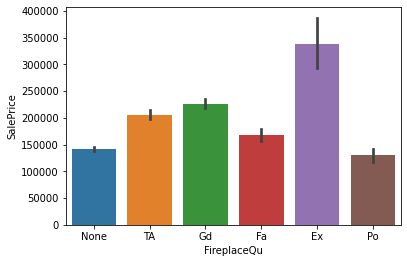

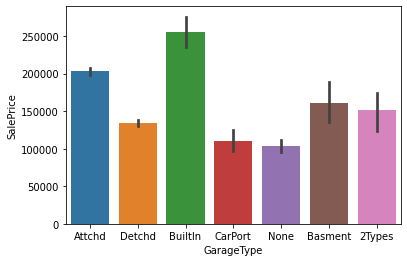

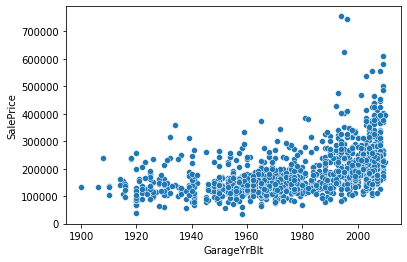

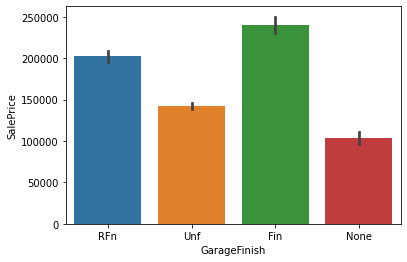

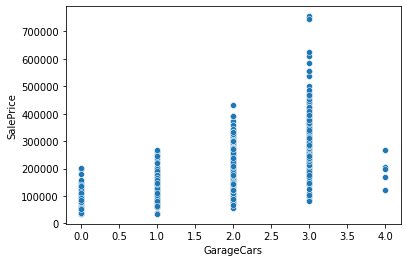

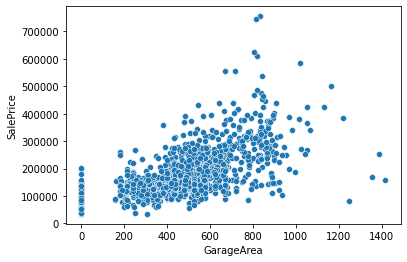

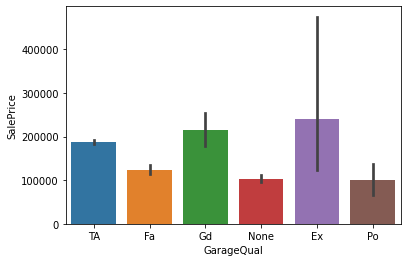

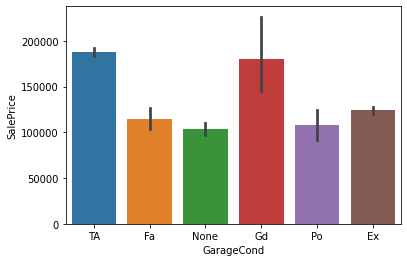

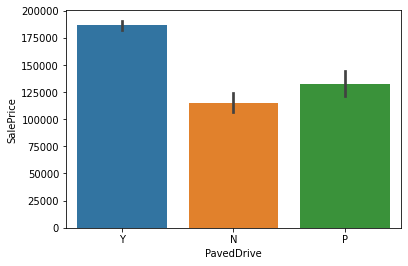

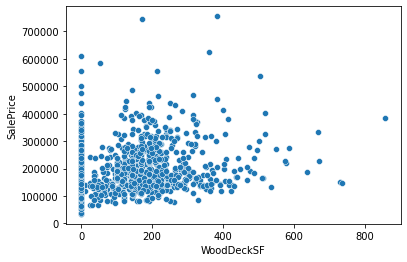

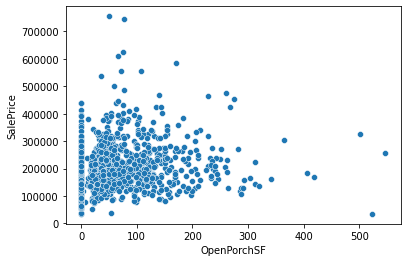

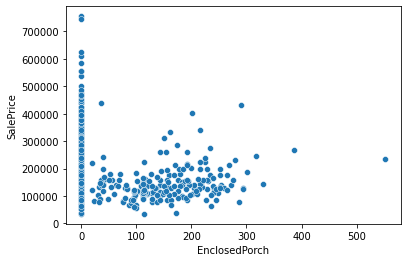

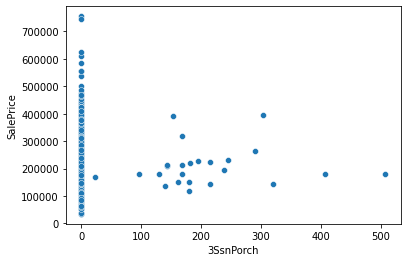

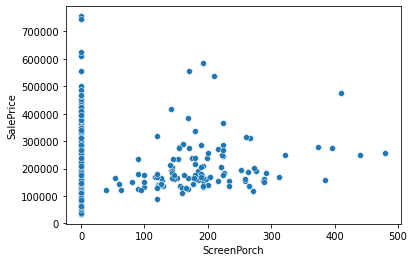

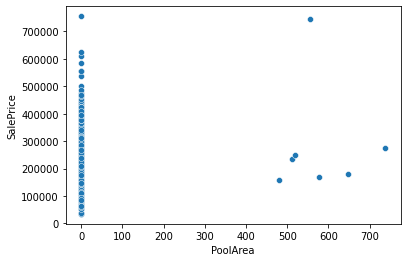

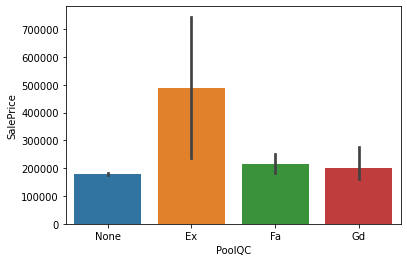

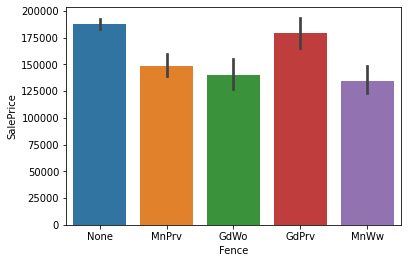

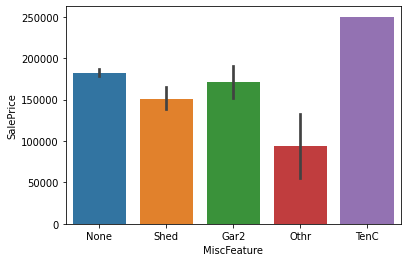

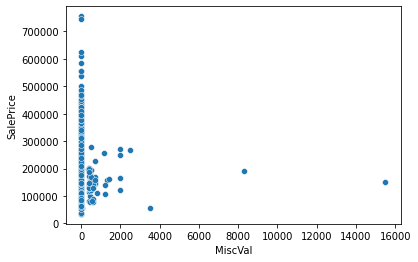

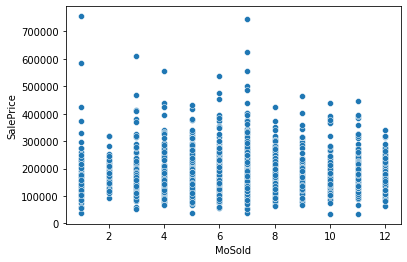

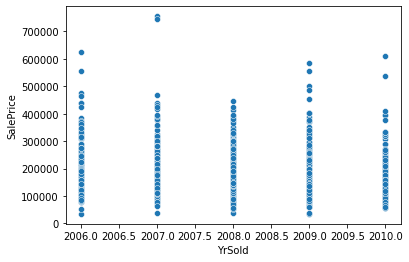

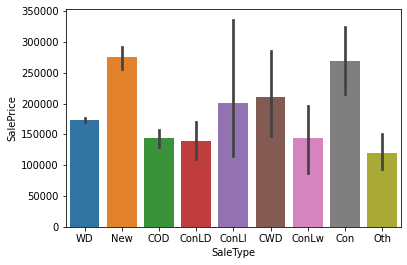

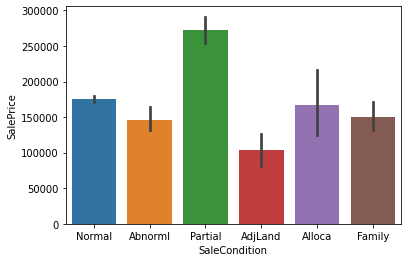

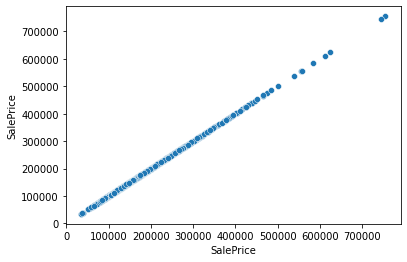

In [20]:
#Bivariate Analysis
for col in df.columns:
    if df[col].dtype=='O':
        sns.barplot(data=df,x=col,y='SalePrice')
        plt.show()
    else:
        sns.scatterplot(data=df,x=col,y='SalePrice')
        plt.show()

**Columns that have monotonic increasing trend with Sale Price:**<br>

**LotShape,LandContour,LandSlope,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,
TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScrenPorch.**

For all the other columns we see a decent pattern and can be understood further with the model building using `Ridge & Lasso` techniques.

<AxesSubplot:>

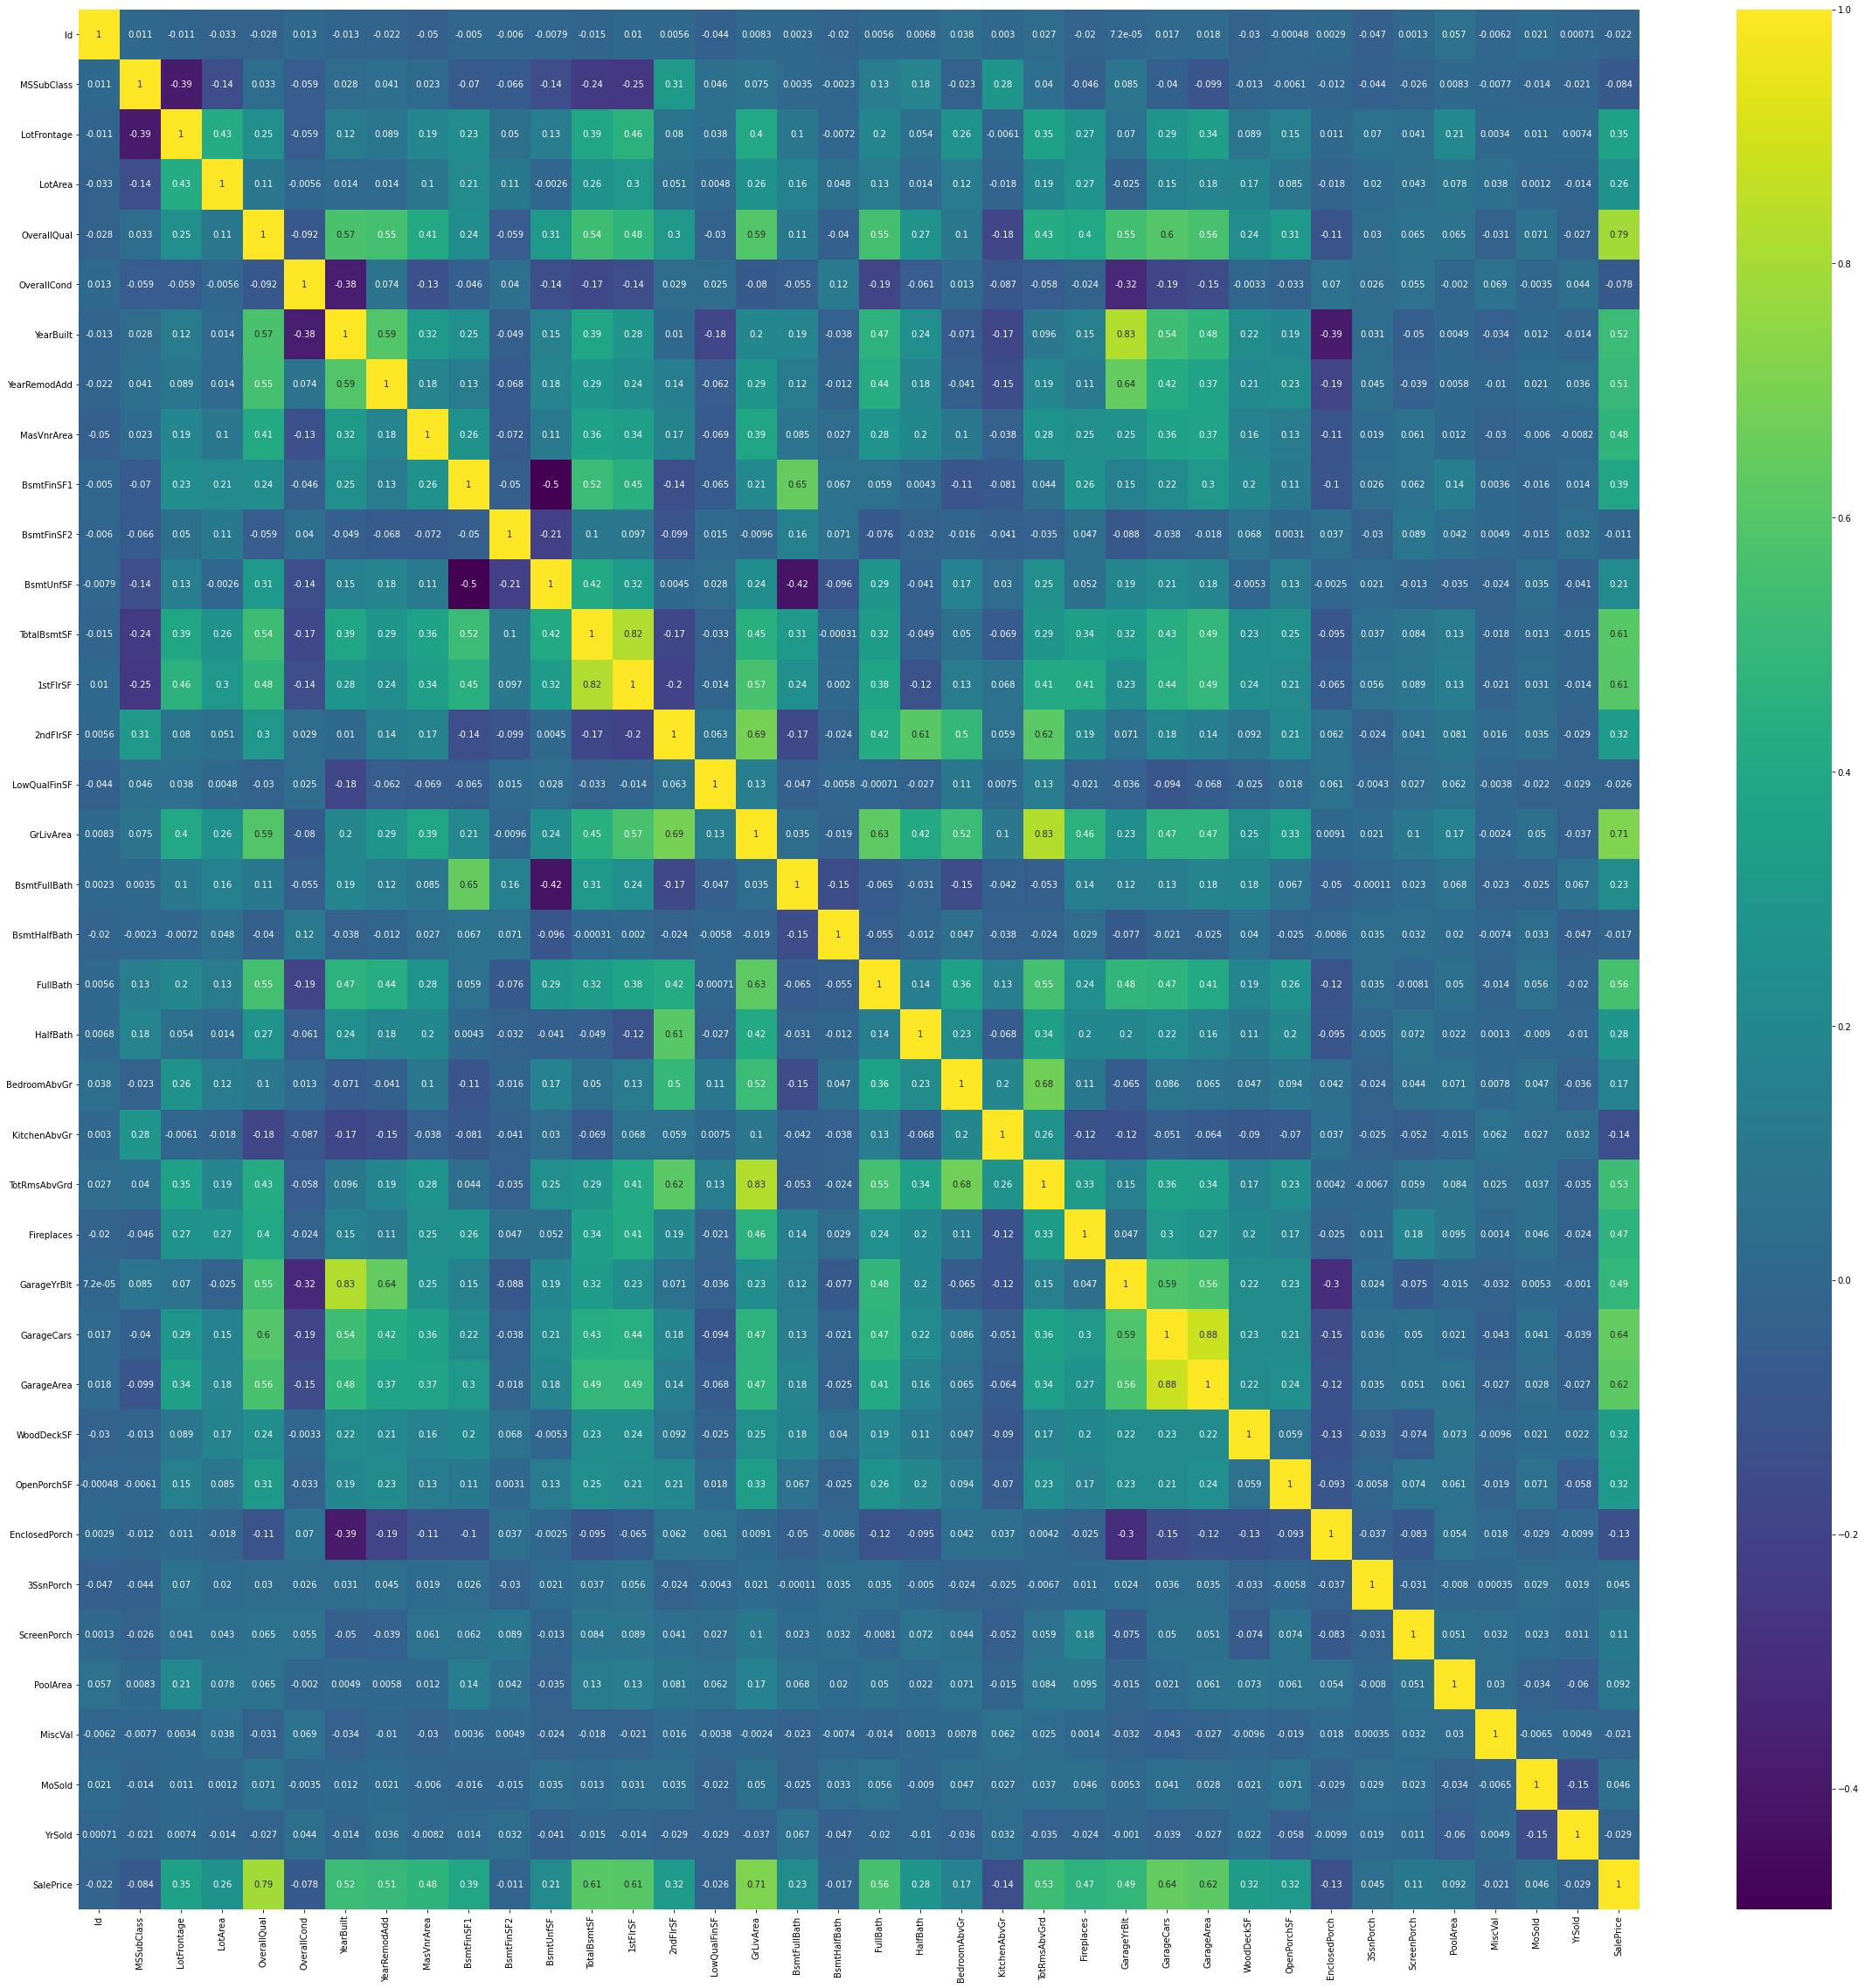

In [21]:
#Correlation of all the columns in data
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [22]:
#Correlation between the predictors and the response variable
df.corr().tail(1).T.sort_values('SalePrice',ascending=False).style.background_gradient()

In [23]:
#Getting the columns that have years
year_cols=[col for col in df.columns if col.find('Year')>=0 or col.find('Yr')>=0]
df[year_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     1460 non-null   int64  
 1   YearRemodAdd  1460 non-null   int64  
 2   GarageYrBlt   1379 non-null   float64
 3   YrSold        1460 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


In [24]:
#Numerical column: GarageYrBlt contains missing values, hence imputed with median & convert its type
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['GarageYrBlt'].astype('int64')

0       2003
1       1976
2       2001
3       1998
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: GarageYrBlt, Length: 1460, dtype: int64

In [25]:
#to check the null value columns left in dataframe
df.isnull().sum().sort_values(ascending=False)

LotFrontage     259
MasVnrArea        8
Id                0
KitchenAbvGr      0
GarageYrBlt       0
               ... 
ExterQual         0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 81, dtype: int64

* NOTE: The above columns will be imputed further before the model building.

## Applying log transformation to response variable

In [26]:
#From Univariate analysis above,its observed that response variable is left skewed, hence transform the response variable to log form
df['SalePrice']=np.log(df['SalePrice'])

In [27]:
#Summary stats of the response variable
df['SalePrice'].describe()

count   1,460.00
mean       12.02
std         0.40
min        10.46
25%        11.78
50%        12.00
75%        12.27
max        13.53
Name: SalePrice, dtype: float64

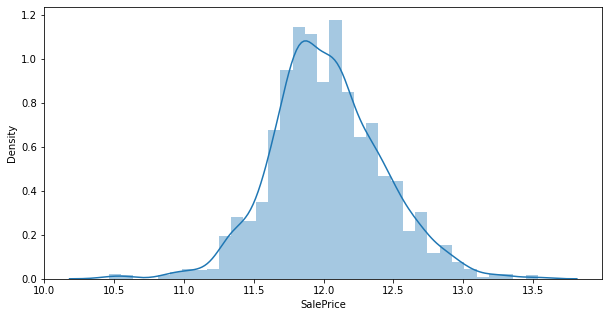

In [28]:
# target variable: after ransforming->Looks normally distributed
plt.figure(figsize=(10,5))
sns.distplot(df['SalePrice'])
plt.show()

# Model Buliding Regressions: Linear, Ridge & Lasso

In [29]:
#Since we have very small dataset we will be using 80% of the data for Training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice',axis=1), df['SalePrice'], test_size=0.20, random_state=100)

In [30]:
#list of numerical & categorical columns
num_cols=[col for col in X_train.columns if X_train[col].dtype!='O' and col!='Id']
cat_cols=[col for col in X_train.columns if X_train[col].dtype=='O']

print(num_cols)
print(cat_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCon

## Creating Pipelines and ColumnTransformers

In [31]:
#Creating a pipeline to pre-process the categorical columns
cat_pipe=Pipeline([
    ('cat_imp',SimpleImputer(strategy='constant',fill_value='None')),
    ('cat_ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'))
])

In [32]:
#fit the data for the transformed categorical columns
cat_pipe.fit(X_train[cat_cols])

Pipeline(steps=[('cat_imp',
                 SimpleImputer(fill_value='None', strategy='constant')),
                ('cat_ohe',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [33]:
#Creating a pipeline to pre-process the numerical columns
num_pipe=Pipeline([
    ('num_imp',SimpleImputer(strategy='median')),
    ('num_scal',RobustScaler())
])

In [34]:
#Combining both categorical & numerical pipe-lines using ColumnTransformer
ct=ColumnTransformer([
    ('num_pipe',num_pipe,num_cols),
    ('cat_pipe',cat_pipe,cat_cols)    
],remainder='drop')

##### After building piplines with model, we will have num_cols and One hot encoded columns , hence creating all_cols variables

In [35]:
#creating a list which includes all the columns after the data pre-processing: numerical & one hot encoded categorical columns
all_cols=num_cols.copy()
all_cols.extend(ct.transformers[1][1].named_steps['cat_ohe'].get_feature_names(cat_cols))

## Creating Linear, Ridge and Lasso Pipelines

In [36]:
#create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#creating a pipe-line with linear regression model & rfe 
lm = LinearRegression()
linear=Pipeline([
    ('ct',ct),('lm',lm)
])

#create a pipeline for Ridge & Lasso 
ridge=make_pipeline(ct,Ridge())
lasso=make_pipeline(ct,Lasso())

# Fitting Linear Model with GridSearchCV

In [37]:
#Call GridSearchCV()
linear_model = GridSearchCV(estimator = linear, 
                        param_grid=[{'lm__fit_intercept':[True]}],scoring= 'r2', 
                        cv =2, 
                        verbose = 0,
                        return_train_score=True) 
# fit the model
linear_model.fit(X_train,y_train);

In [38]:
#to see the summary of GridSearch for the linear regression model
pd.DataFrame(linear_model.cv_results_,columns=['params','mean_test_score','mean_train_score','rank_test_score'])\
    .sort_values('rank_test_score')

params  mean_test_score  mean_train_score  \
0  {'lm__fit_intercept': True}             0.79              0.97   

   rank_test_score  
0                1

# Fitting Ridge Model with GridSearchCV

In [39]:
#Ridge Regression

#Call GridSearchCV()
ridge_model = GridSearchCV(estimator = ridge, 
                        param_grid = [{'ridge__alpha': [0.0005,.001,0.005,0.001, 0.05,0.1,0.5,1,1.5,5,10,20,50,100,200,500]}], 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 
#fit the ridge model
ridge_model.fit(X_train,y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [40]:
#to see the summary of GridSearch for the ridge model
pd.DataFrame(ridge_model.cv_results_,columns=['params','mean_test_score','mean_train_score','rank_test_score'])\
    .sort_values('rank_test_score')

params  mean_test_score  mean_train_score  \
10      {'ridge__alpha': 10}             0.86              0.93   
9        {'ridge__alpha': 5}             0.86              0.93   
11      {'ridge__alpha': 20}             0.86              0.92   
8      {'ridge__alpha': 1.5}             0.86              0.94   
7        {'ridge__alpha': 1}             0.86              0.95   
12      {'ridge__alpha': 50}             0.85              0.91   
6      {'ridge__alpha': 0.5}             0.85              0.95   
13     {'ridge__alpha': 100}             0.85              0.90   
14     {'ridge__alpha': 200}             0.84              0.89   
5      {'ridge__alpha': 0.1}             0.84              0.95   
4     {'ridge__alpha': 0.05}             0.84              0.96   
2    {'ridge__alpha': 0.005}             0.83              0.96   
1    {'ridge__alpha': 0.001}             0.83              0.96   
3    {'ridge__alpha': 0.001}             0.83              0.96   
0   {'ridge__alpha': 0.0005}             0.83              0.96   
15     {'ridge__alpha': 500}             0.83              0.86   

    rank_test_score  
10                1  
9                 2  
11                3  
8                 4  
7                 5  
12                6  
6                 7  
13                8  
14                9  
5                10  
4                11  
2                12  
1                13  
3                13  
0                15  
15               16

In [41]:
print(ridge_model.best_params_)

{'ridge__alpha': 10}


In [42]:
#creating a final list of all the trasnformed columns: categorical + numerical
temp=ridge_model.best_estimator_.named_steps['columntransformer'].named_transformers_['cat_pipe'].named_steps['cat_ohe'].get_feature_names(cat_cols)
all_cols=[]
all_cols.extend(num_cols)
all_cols.extend(temp)

# Fitting Lasso Model with GridSearchCV

In [43]:
#Lasso Regression

#  call GridSearchCV()
lasso_model = GridSearchCV(estimator = lasso, 
                        param_grid = [{'lasso__alpha': [0,0.0005,.001,0.005,0.01, 0.05,0.1,0.5,1,1.5]}], 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 


In [44]:
#fit the lasso model
lasso_model.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [45]:
#to see the summary of GridSearch for the lasso model
pd.DataFrame(lasso_model.cv_results_,columns=['params','mean_test_score','mean_train_score','rank_test_score'])\
    .sort_values('rank_test_score')

params  mean_test_score  mean_train_score  \
1  {'lasso__alpha': 0.0005}             0.86              0.94   
2   {'lasso__alpha': 0.001}             0.86              0.92   
0       {'lasso__alpha': 0}             0.83              0.96   
3   {'lasso__alpha': 0.005}             0.82              0.87   
4    {'lasso__alpha': 0.01}             0.81              0.86   
5    {'lasso__alpha': 0.05}             0.73              0.76   
6     {'lasso__alpha': 0.1}             0.61              0.62   
7     {'lasso__alpha': 0.5}             0.01              0.04   
8       {'lasso__alpha': 1}             0.00              0.03   
9     {'lasso__alpha': 1.5}            -0.00              0.02   

   rank_test_score  
1                1  
2                2  
0                3  
3                4  
4                5  
5                6  
6                7  
7                8  
8                9  
9               10

In [46]:
#Comparision dataframe of all coef's obtained with best estimator using both ridge & lasso models
coef=pd.DataFrame()
coef['columns']=all_cols
coef['lasso']=lasso_model.best_estimator_.named_steps['lasso'].coef_
coef['ridge']=ridge_model.best_estimator_.named_steps['ridge'].coef_
coef.sort_values(['columns'],ascending=False).style.background_gradient()

# Model Evaluation

## Plotting various lambda value vs train and test score for Ridge Model

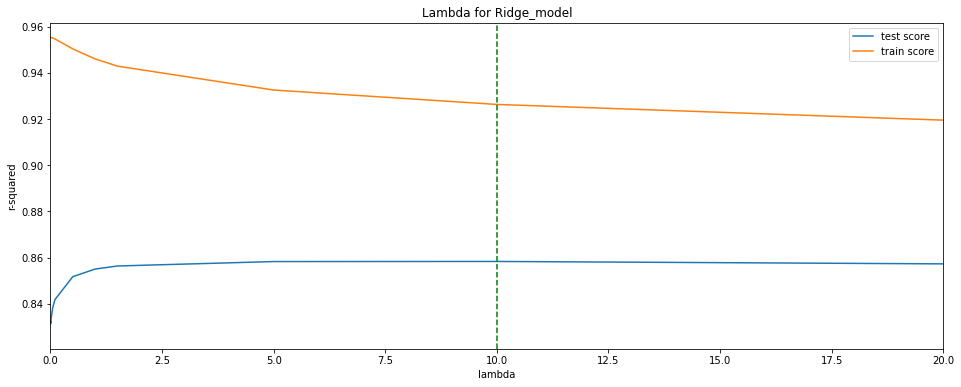

In [47]:
#Plotting ridge cv results for train & test: Lambda Vs r-squared(mean)
ridge_cv=pd.DataFrame(ridge_model.cv_results_)

plt.figure(figsize=(16,6))

plt.plot(ridge_cv["param_ridge__alpha"], ridge_cv["mean_test_score"])
plt.plot(ridge_cv["param_ridge__alpha"], ridge_cv["mean_train_score"])
plt.xlabel('lambda')
plt.ylabel('r-squared')
plt.xlim(0,20)
plt.axvline(10, color ="green", linestyle ="--")
plt.title("Lambda for Ridge_model")
plt.legend(['test score', 'train score'], loc='upper right')
plt.show()

## Plotting various lambda value vs train and test score for Lasso Model

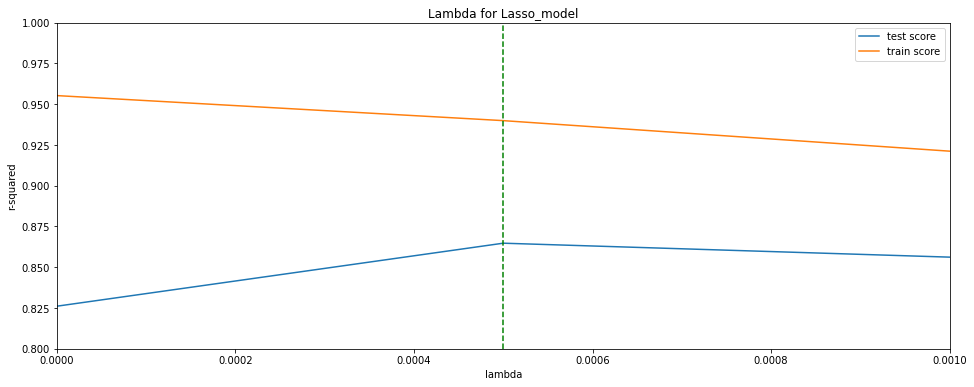

In [48]:
#Plotting lasso cv results for train & test: Lambda Vs r-squared(mean)
lasso_cv=pd.DataFrame(lasso_model.cv_results_)

plt.figure(figsize=(16,6))

plt.plot(lasso_cv["param_lasso__alpha"], lasso_cv["mean_test_score"])
plt.plot(lasso_cv["param_lasso__alpha"], lasso_cv["mean_train_score"])
plt.xlabel('lambda')
plt.ylabel('r-squared')
plt.xlim(0,.001)
plt.ylim(.8,1)
plt.title("Lambda for Lasso_model")
plt.axvline(0.0005, color ="green", linestyle ="--")
plt.legend(['test score', 'train score'], loc='upper right')

## Creating Ridge and Lasso Model with Optimal lambda and thier respective doubles

In [49]:
ridge_10=Pipeline([
    ('ct',ct),('ridge10',Ridge(alpha=10))
])
ridge_20=Pipeline([
    ('ct',ct),('ridge20',Ridge(alpha=20))
])
lasso_0005=Pipeline([
    ('ct',ct),('lasso0005',Lasso(alpha=0.0005))
])
lasso_001=Pipeline([
    ('ct',ct),('lasso001',Lasso(alpha=0.001))
])

In [50]:
# we're getting 
ridge_10.fit(X_train,y_train)
ridge_20.fit(X_train,y_train)
lasso_0005.fit(X_train,y_train)
lasso_001.fit(X_train,y_train);

## Regression Metrics for Linear Model

In [51]:
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)


def adj_r2_score(act,pred,n,p):
    R2=r2_score(act, pred)
    adj_r2=1-(1-R2)*(n-1)/(n-p-1)
    return  adj_r2

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train score: ',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test score: ',r2_test_lr)
metric.append(r2_test_lr)

print('Adjusted r2 train score: ',adj_r2_score(y_train,y_pred_train,len(y_train),len(all_cols)))
print('Adjusted r2 test score: ',adj_r2_score(y_test,y_pred_test,len(y_train),len(all_cols)))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE Train: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE Test: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 train score:  0.9519228735218161
r2 test score:  0.7781601986873821
Adjusted r2 train score:  0.9352871896193304
Adjusted r2 test score:  0.7013990217626007
RSS Train:  8.775375736544808
RSS Test:  11.152142396909356
MSE Train:  0.007513164158000692
MSE Test:  0.03819226848256629


## Regression Metrics for Ridge Model

In [52]:
y_pred_train = ridge_10.predict(X_train)
y_pred_test = ridge_10.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train score: ',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test score: ',r2_test_lr)
metric.append(r2_test_lr)

print('Adjusted r2 train score: ',adj_r2_score(y_train,y_pred_train,len(y_train),len(all_cols)))
print('Adjusted r2 test score: ',adj_r2_score(y_test,y_pred_test,len(y_train),len(all_cols)))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE Train: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE Test: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 train score:  0.9229744349228974
r2 test score:  0.8932116917807705
Adjusted r2 train score:  0.8963219902595402
Adjusted r2 test score:  0.856260720078615
RSS Train:  14.05924863620911
RSS Test:  5.368371286573791
MSE Train:  0.012037027941959854
MSE Test:  0.018384833173197914


## Regression Metrics for Lasso Model

In [53]:
y_pred_train = lasso_0005.predict(X_train)
y_pred_test = lasso_0005.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train score: ',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test score: ',r2_test_lr)
metric.append(r2_test_lr)

print('Adjusted r2 train score: ',adj_r2_score(y_train,y_pred_train,len(y_train),len(all_cols)))
print('Adjusted r2 test score: ',adj_r2_score(y_test,y_pred_test,len(y_train),len(all_cols)))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE Train: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE Test: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 train score:  0.9354943427765182
r2 test score:  0.887210733289919
Adjusted r2 train score:  0.9131740461593965
Adjusted r2 test score:  0.8481833053625553
RSS Train:  11.77402687587169
RSS Test:  5.670046383702147
MSE Train:  0.010080502462218914
MSE Test:  0.019417967067473105


In [54]:
y_pred_train=lasso_0005.predict(X_train)

In [55]:
y_pred=lasso_0005.predict(X_test)

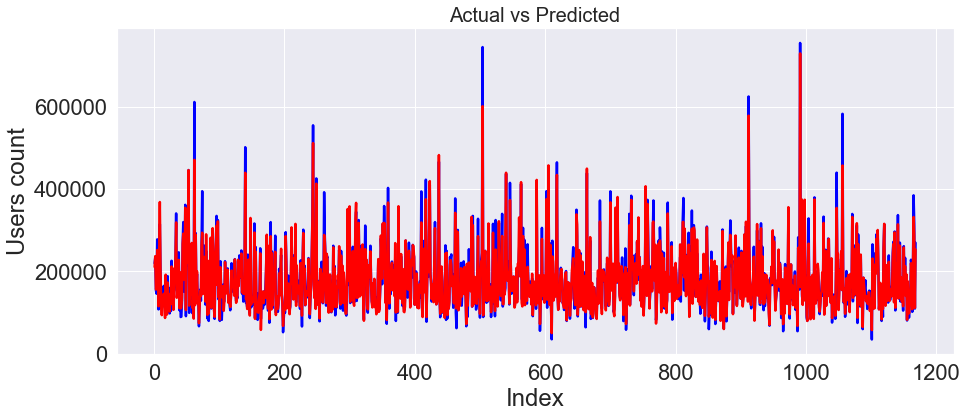

In [56]:
#Actual vs Predicted
record_count = [i for i in range(1, y_pred_train.size+1, 1)]
plt.figure(figsize=(15, 6))
sns.set(font_scale=2)
sns.lineplot(record_count,np.exp(y_train), color="blue", linewidth=2.5, linestyle="-")
sns.lineplot(record_count,np.exp(y_pred_train), color="red",  linewidth=2.5, linestyle="-")
plt.title('Actual vs Predicted', fontsize=20)  
plt.xlabel('Index')                   
plt.ylabel('Users count')
plt.show()

<AxesSubplot:xlabel='Actual_SalePrice', ylabel='Predcited_SalePrice'>

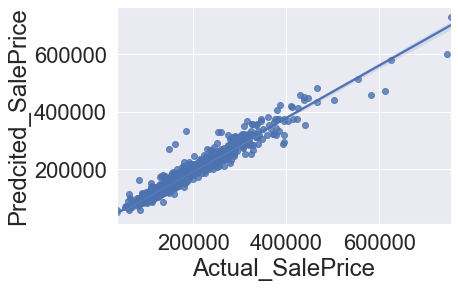

In [57]:
#Actual House price will inverse of log because we trained model on log of saleprice

new_df=pd.DataFrame()
new_df['Actual_SalePrice']=np.exp(y_train)
new_df['Predcited_SalePrice']=np.exp(y_pred_train)

sns.regplot(data=new_df,x='Actual_SalePrice',y='Predcited_SalePrice')

# Validating Assumption of Linear Regression

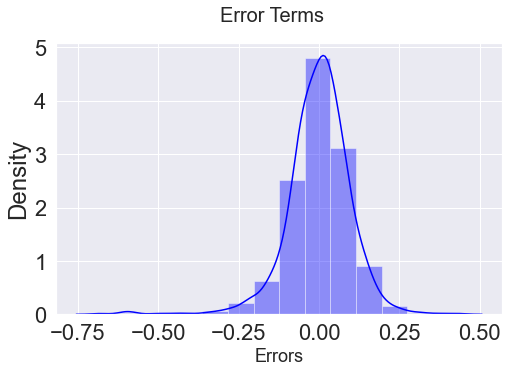

In [58]:
# Plot the histogram of the error terms-> to check if error terms are normally distributed
fig = plt.figure(figsize=(8,5))
res = y_train - y_pred_train
sns.distplot(res,bins=14,color="Blue")
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

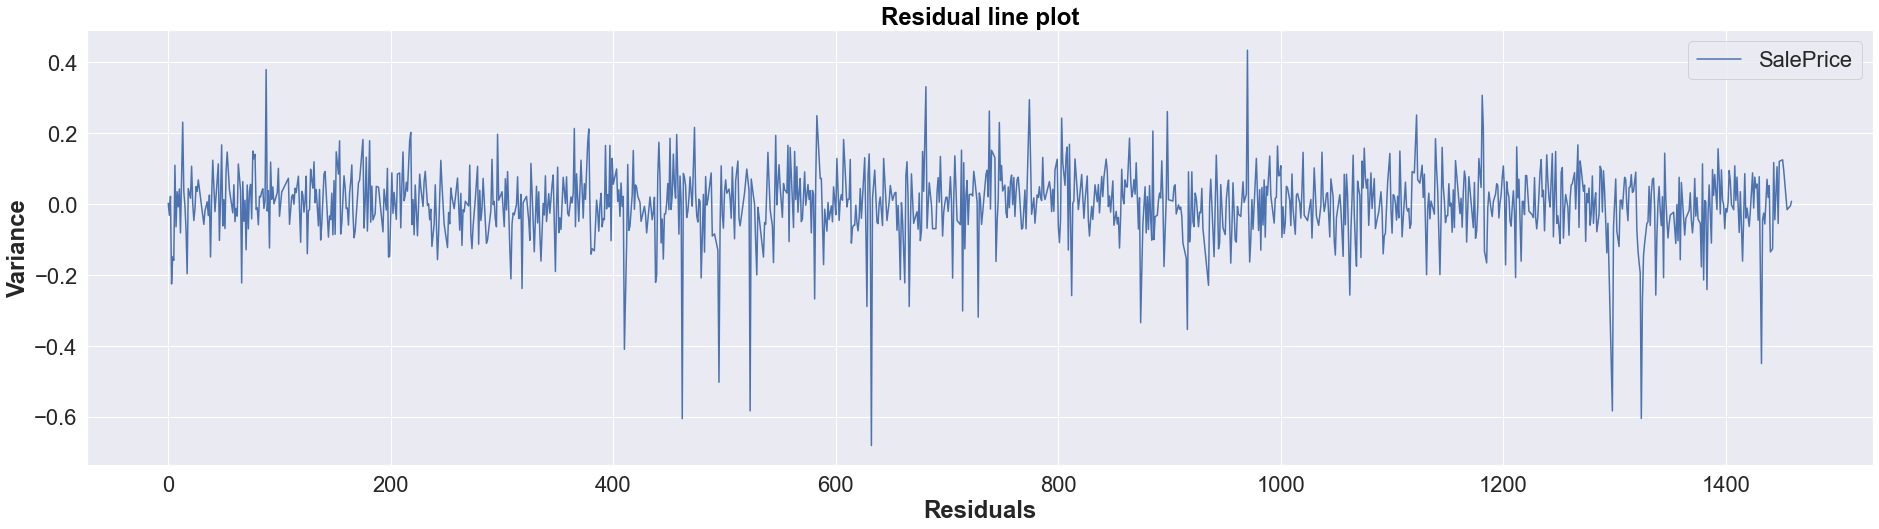

In [59]:
#Plot: To check variance in error terms
plt.figure(figsize=(32,8))
sns.set(font_scale=2)
sns.lineplot(data=pd.DataFrame(res))
plt.xlabel('Residuals', fontweight='bold')
plt.ylabel('Variance', fontweight='bold')
plt.title('Residual line plot', color='black', fontweight='bold')
plt.show()

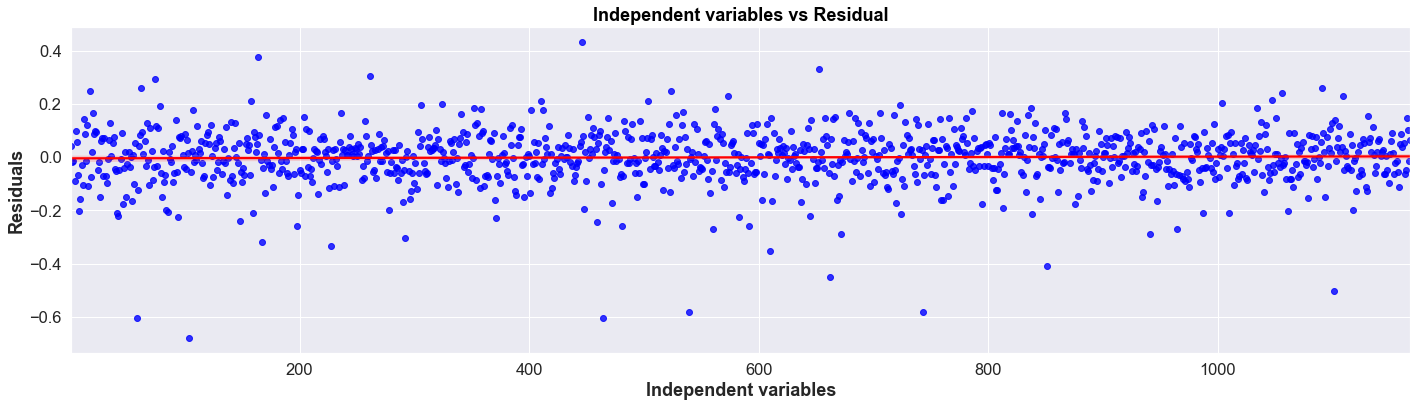

In [60]:
#Plot: To check if error terms are independent to each other
plt.figure(figsize=(24,6))
sns.set(font_scale=1.5)
record_count = [i for i in range(1, X_train.shape[0]+1, 1)]
sns.regplot(x=record_count, y=res, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Independent variables', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.title('Independent variables vs Residual', color='black', fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Dependent variables vs Residual')

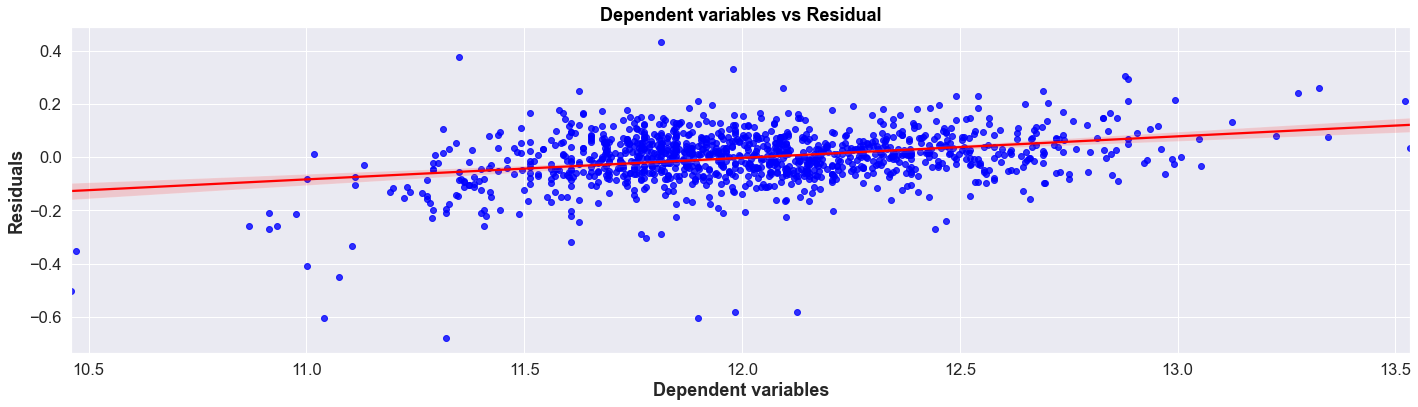

In [61]:
#Plot: Dependent variables vs Residuals
plt.figure(figsize=(24,6))
sns.set(font_scale=1.5)
sns.regplot(x=y_train, y=res, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Dependent variables', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.title('Dependent variables vs Residual', color='black', fontweight='bold')

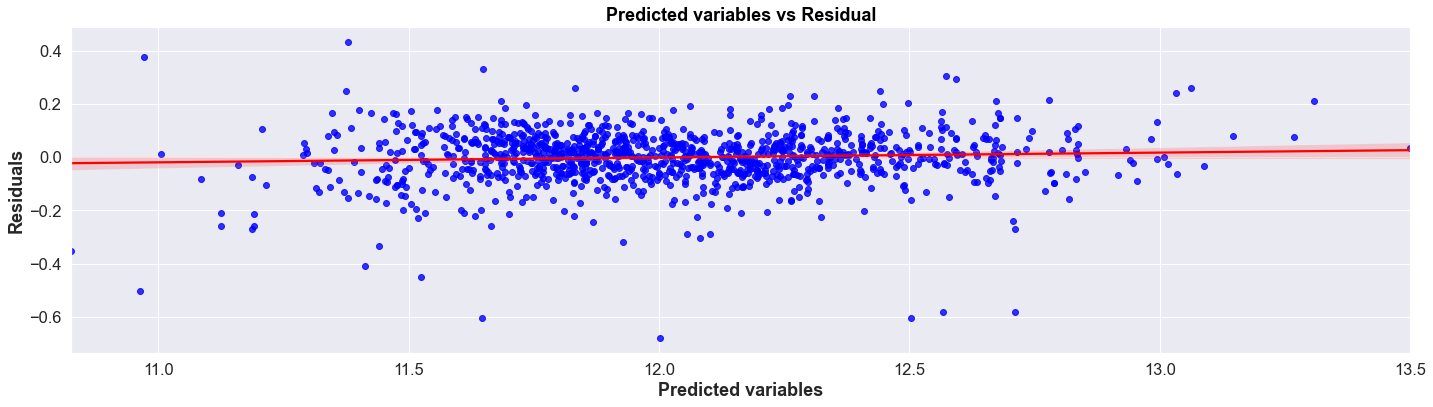

In [62]:
#Plot: Variance in the error terms-> to check if error terms have constant variance
plt.figure(figsize=(24,6))
sns.set(font_scale=1.5)
sns.regplot(x=y_pred_train, y=res, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('Predicted variables', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.title('Predicted variables vs Residual', color='black', fontweight='bold')
plt.show()

In [63]:
final_model=pd.DataFrame((lasso_0005.named_steps['lasso0005'].coef_),columns=['lasso_0005'])
final_model['Columns']=all_cols
final_model

lasso_0005                Columns
0         -0.01             MSSubClass
1         -0.00            LotFrontage
2          0.01                LotArea
3          0.09            OverallQual
4          0.04            OverallCond
..          ...                    ...
295        0.00  SaleCondition_AdjLand
296       -0.00   SaleCondition_Alloca
297       -0.00   SaleCondition_Family
298        0.03   SaleCondition_Normal
299        0.00  SaleCondition_Partial

[300 rows x 2 columns]

In [64]:
temp=final_model[final_model['lasso_0005']==0]['Columns']

In [65]:
pd.set_option('display.max_rows', 500)

print(temp)

pd.set_option('display.max_rows', 50)

10                 BsmtUnfSF
12                  1stFlrSF
13                  2ndFlrSF
17              BsmtHalfBath
24               GarageYrBlt
34                    MoSold
38               MSZoning_RH
39               MSZoning_RL
41               Street_Grvl
42               Street_Pave
43                Alley_Grvl
44                Alley_None
46              LotShape_IR1
47              LotShape_IR2
48              LotShape_IR3
51           LandContour_HLS
52           LandContour_Low
53           LandContour_Lvl
54          Utilities_AllPub
55          Utilities_NoSeWa
59             LotConfig_FR3
60          LotConfig_Inside
61             LandSlope_Gtl
63             LandSlope_Sev
64      Neighborhood_Blmngtn
65      Neighborhood_Blueste
66       Neighborhood_BrDale
69      Neighborhood_CollgCr
76        Neighborhood_NAmes
77      Neighborhood_NPkVill
78       Neighborhood_NWAmes
81      Neighborhood_OldTown
82        Neighborhood_SWISU
84      Neighborhood_SawyerW
87       Neigh

# Business Objective - Conclusion

### As per the business objective lasso model is chosen with the best lambda value as 0.0005. With this lambda its observed that these columns are the significant variables that will influence the response variable Sale Price.


In [66]:
# Lasso model with alpha=0.0005
final_model[final_model['lasso_0005']!=0.000].sort_values('lasso_0005',ascending=False)\
.style.background_gradient('RdYlGn').set_precision(6)

In [67]:
#Top 10 Positive Predictor of Saleprice
final_model.sort_values('lasso_0005',ascending=False).head(10)\
.style.background_gradient('Greens')

In [68]:
#Top 10 Negative Predictor of SalePrice
final_model.sort_values('lasso_0005',ascending=True).head(10)\
.style.background_gradient('Reds_r')

In [69]:
print('Total Columns: ',len(all_cols))
print('Final Columns : ',final_model[final_model['lasso_0005']!=0.000].shape[0])

Total Columns:  300
Final Columns :  119


# Question and Answer (Coding part)

### Question 1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [70]:
q1=pd.DataFrame((ridge_10.named_steps['ridge10'].coef_),columns=['ridge_10'])
q1['ridge_20']=ridge_20.named_steps['ridge20'].coef_
q1['lasso_0005']=lasso_0005.named_steps['lasso0005'].coef_
q1['lasso_001']=lasso_001.named_steps['lasso001'].coef_
q1['columns']=all_cols
q1.sort_values(['lasso_001','lasso_0005','ridge_20','ridge_10'],ascending=False).style.background_gradient(axis=0)

for i in ['lasso_0005','lasso_001','ridge_10','ridge_20']:
    print(q1.sort_values(i,ascending=False).head(10)[['columns',i]])
    print('-'*50)

                  columns  lasso_0005
15              GrLivArea        0.16
70   Neighborhood_Crawfor        0.12
3             OverallQual        0.09
5               YearBuilt        0.08
86   Neighborhood_StoneBr        0.08
80   Neighborhood_NridgHt        0.06
229        KitchenQual_Ex        0.06
136   Exterior1st_BrkFace        0.06
288        SaleType_ConLD        0.06
239        Functional_Typ        0.06
--------------------------------------------------
                  columns  lasso_001
15              GrLivArea       0.14
3             OverallQual       0.11
70   Neighborhood_Crawfor       0.10
5               YearBuilt       0.08
80   Neighborhood_NridgHt       0.07
91        Condition1_Norm       0.06
229        KitchenQual_Ex       0.05
25             GarageCars       0.05
136   Exterior1st_BrkFace       0.05
192       BsmtExposure_Gd       0.05
--------------------------------------------------
                  columns  ridge_10
70   Neighborhood_Crawfor      0.10
3

The Optimal value of alpha for Ridge and Lasso is 100 and 0.005 repectively. If we double them it will be 200 and 0.01 respectively. We observe train and test r2 score drops leading to underfitting of the model and also coefficient values for different columns get changed as seen above.

In [71]:
pd.DataFrame(ridge_model.cv_results_,columns=['params','mean_test_score','mean_train_score','rank_test_score'])\
    .sort_values('rank_test_score')[:3]

params  mean_test_score  mean_train_score  rank_test_score
10  {'ridge__alpha': 10}             0.86              0.93                1
9    {'ridge__alpha': 5}             0.86              0.93                2
11  {'ridge__alpha': 20}             0.86              0.92                3

### Question 2: You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

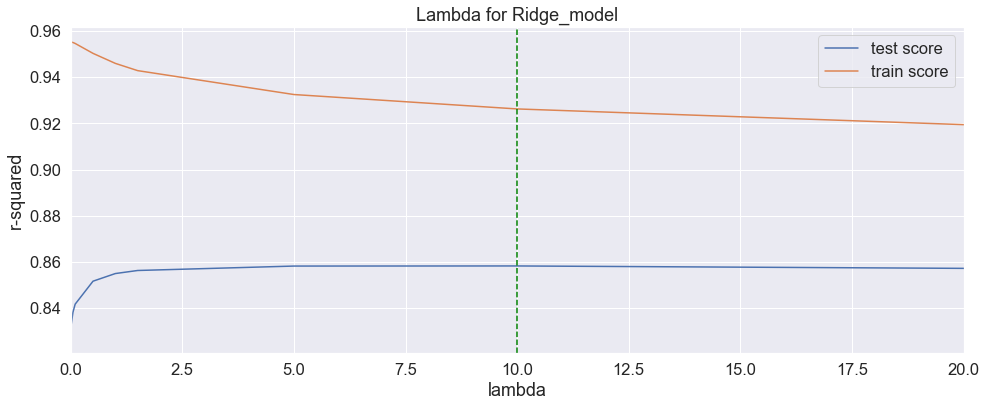

In [72]:
#Plotting ridge cv results for train & test: Lambda Vs r-squared(mean)
ridge_cv=pd.DataFrame(ridge_model.cv_results_)

plt.figure(figsize=(16,6))

plt.plot(ridge_cv["param_ridge__alpha"], ridge_cv["mean_test_score"])
plt.plot(ridge_cv["param_ridge__alpha"], ridge_cv["mean_train_score"])
plt.xlabel('lambda')
plt.ylabel('r-squared')
plt.xlim(0,20)
plt.axvline(10, color ="green", linestyle ="--")
plt.title("Lambda for Ridge_model")
plt.legend(['test score', 'train score'], loc='upper right')
plt.show()

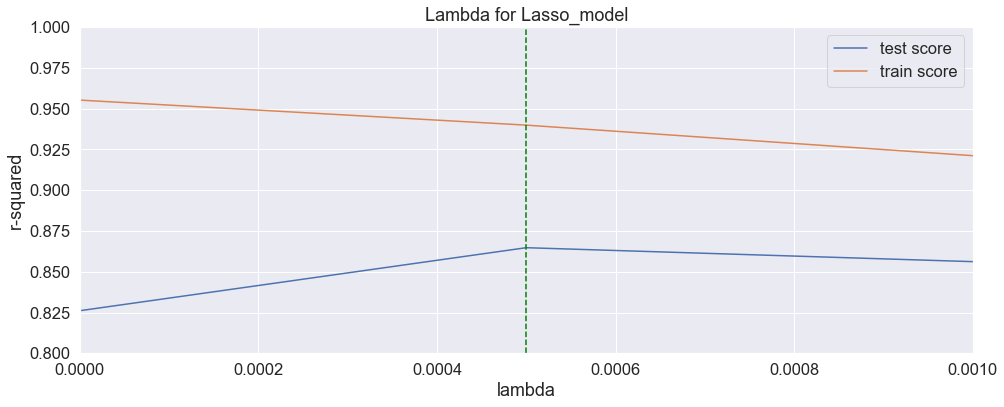

In [73]:
#Plotting lasso cv results for train & test: Lambda Vs r-squared(mean)
lasso_cv=pd.DataFrame(lasso_model.cv_results_)

plt.figure(figsize=(16,6))

plt.plot(lasso_cv["param_lasso__alpha"], lasso_cv["mean_test_score"])
plt.plot(lasso_cv["param_lasso__alpha"], lasso_cv["mean_train_score"])
plt.xlabel('lambda')
plt.ylabel('r-squared')
plt.xlim(0,.001)
plt.ylim(.8,1)
plt.title("Lambda for Lasso_model")
plt.axvline(0.0005, color ="green", linestyle ="--")
plt.legend(['test score', 'train score'], loc='upper right')

### Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [74]:
final_model.sort_values(by='lasso_0005',ascending=False).head(5)

lasso_0005               Columns
15        0.16             GrLivArea
70        0.12  Neighborhood_Crawfor
3         0.09           OverallQual
5         0.08             YearBuilt
86        0.08  Neighborhood_StoneBr

In [75]:
top5=['GrLivArea','Neighborhood_Crawfor','OverallQual','YearBuilt','Neighborhood_StoneBr']

In [76]:
new_df=pd.DataFrame(ct.fit_transform(X_train),columns=all_cols).drop(top5,axis=1)

In [77]:
lasso_2=Lasso(alpha=0.0005)
lasso_2.fit(new_df,y_train)
lasso_df=pd.DataFrame(lasso_2.coef_,columns=['coeff'])
lasso_df['columns']=new_df.columns
lasso_df.sort_values('coeff',ascending=False).head(5)

coeff         columns
11    0.18        2ndFlrSF
10    0.14        1stFlrSF
224   0.09  KitchenQual_Ex
283   0.08  SaleType_ConLD
176   0.08     BsmtQual_Ex

### Question 4: How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

In [78]:
y_pred_train = lasso_0005.predict(X_train)
y_pred_test = lasso_0005.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train score: ',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test score: ',r2_test_lr)
metric.append(r2_test_lr)

print('Adjusted r2 train score: ',adj_r2_score(y_train,y_pred_train,len(y_train),len(all_cols)))
print('Adjusted r2 test score: ',adj_r2_score(y_test,y_pred_test,len(y_train),len(all_cols)))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE Train: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE Test: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 train score:  0.9354943427765182
r2 test score:  0.887210733289919
Adjusted r2 train score:  0.9131740461593965
Adjusted r2 test score:  0.8481833053625553
RSS Train:  11.77402687587169
RSS Test:  5.670046383702147
MSE Train:  0.010080502462218914
MSE Test:  0.019417967067473105
